***Студент: Багдасарян Эдуард Арменович***

***Группа: 238-1***

***Вариант: 22***

# **Математический анализ II. Лабораторная работа №1**

<font color=#FF5EDD>**Правила:**</font>
1. ***Запрещено*** изменять функции! В тех задачах, где Вам дана функция в коде проверяться будет только код, написанный внутри этой данной функции. Также ***запрещено*** изменять значения переменных, которые определены кодом в некоторых заданиях.
2. Все считаем и выполняем с помощью кода. (Где необходимо: не забываем пояснять текстом).

**Перед отправкой обязательно перезапустите ядро и скомпилируйте весь ноутбук заново!**
## **<font color=#10A1C4> *Содержание:</font>***

**Примечание:** в google colab в содержании ссылки на задачи работают только когда названия разделов не скрыты

### **<font color=#10A1C4>*Содержание по задачам:</font>***

[1. Раздел: ряды Фурье](#part_1) <br/>
* [Задача 1](#task_1) (1 балл)<br>
* [Задача 2](#task_2) (2 балла)<br>
* [Задача 3](#task_3) (2 балла)<br>
* [Задача 4](#task_4) (2 балла)<br>

[2. Раздел: фuльтрацuя шума с помощью дuскретного преобразованuя Фурье](#part_2) <br/>
* [Задача 5](#task_5) (4 балла)<br>
* [Задача 6](#task_6) (3 балла)<br>
* [Задача 7](#task_7) (4 балла)<br>
* [Задача 8](#task_8) (2 балла) <br>
* [Задача 9](#task_9) (4 балла)<br>
* [Задача 10](#task_10) (5 баллов)<br>

[3. Раздел: прогнозирование временных рядов с помощью рядов Фурье. Выявление сезонности и цикличности ряда с помощью преобразования Фурье.](#part_3) <br/>
* [Задача 11](#task_11) (17 баллов)<br>


## **<font color=#10A1C4>*Необходимые библиотеки для всех частей</font>***

In [271]:
import numpy as np
from numpy import pi as Pi_, cos as Cos
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as scsig
from scipy.fft import fft, ifft
import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import math
import pandas as pd
import datetime as dt
import seaborn as sns
import sympy as sp
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline

In [272]:
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install soundfile
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install sympy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

<a name="part_1"></a>
## **<font color=#0078FF>1. Раздел: ряды Фурье</font>**

Ряд Фурьe — представление функции $f$ с периодом $T$ в виде ряда
$$
f(x) \sim \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n}{T} x\right) + b_n \sin\left(\frac{2\pi n}{T} x\right) \right) \tag{1} = S(x)
$$

где коэффициенты $ a_0 $, $ a_n $, и $ b_n $ вычисляются следующим образом:

$$
a_0 = \frac{1}{l} \int_{-l}^{l} f(x) \, dx \tag{2}
$$

$$
a_n = \frac{1}{l} \int_{-l}^{l} f(x) \cos\left(\frac{\pi n}{l} x\right) \, dx
\tag{3}$$

$$
b_n = \frac{1}{l} \int_{-l}^{l} f(x) \sin\left(\frac{\pi n}{l} x\right) \, dx
\tag{4}$$

Где $T = 2l$

Для дальнейших вычислений нам понадобятся следующие знания:
- Функция $f(х)$ называется кусочно-непрерывной на отрезке $[а, b]$, если она непрерывна во всех точках этого отрезка, кроме, может быть, конечного числа точек, в которых она терпит разрывы первого рода (имеет конечные односторонние пределы).
- Кусочно-непрерывная на отрезке $[а, b]$ функция $f(x)$ называется кусочно-гладкой, если она имеет непрерывную производную во всех точках этого отрезка, кроме, может быть, конечного числа точек, в которых производная функции терпит разрывы первого рода.
- Основная теорема о сходимости тригонометрических рядов Фурье может быть сформулирована следующим образом.
Пусть $f(х)$ кусочно-гладкая на отрезке $[-l, l]$ функция. Тогда тригонометрический ряд Фурье $(1)$, коэффициенты которого вычисляются по формулам $(2)-(4)$, сходится в каждой точке этого отрезка.
Если $S(x)$ - сумма тригонометрического ряда Фурье функции
$f(x)$, то
1. $S(x) = f(x)$ во всех точках непрерывности функции $f(x)$, $х ∈
(-l,l)$;
2. $S(x) = \frac{1}{2} (f(x - 0) + f(x + 0))$ во всех точках разрыва функции;
3. $S(-l) = S(l) = \frac{1}{2}(f(-l + 0) + f(l - 0))$ (здесь $f(x - 0)$ - предел слева, а $f(x + 0)$ - предел справа функции $f(x)$ в точке $x$).

Можем взглянуть на результаты добавления членов ряда Фурье при аппроксимации разрывной кусочно-постоянной функции.



<img src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Synthesis_square.gif?20130815204349" style="width: 400px">

Авторство: Lucas Vieira. Собственная работа, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=468472

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/Periodic_identity_function.gif" style="width: 400px">

Авторство: Lucas Vieira. Собственная работа, Общественное достояние, https://commons.wikimedia.org/w/index.php?curid=1213511

Ряды Фурье имеют широкий спектр применений в различных областях, включая анализ сигналов, обработку изображений, решение дифференциальных уравнений, а также в физике, инженерии и многих других дисциплинах. Они позволяют удобно работать с периодическими явлениями, помогая выявить гармонические компоненты в сигнале и понять их влияние.



---



В качестве примера давайте разложим функцию $f(x) = x + 1$ в ряд Фурье на промежутке $[-\pi, \pi]$, а также построим график функции $f(x) = x + 1$ соседних периодах и график частичной суммы ряда $S_2(x)$ на этих же периодах.

В данной задаче период разложения $T = 2\pi$, значит $l = \pi$.

$a_0 = \frac{1}{l} \int_{-l}^{l} f(x) \, dx = 2$ (вычисления, конечно же, пропустим)

$a_n = \frac{1}{l} \int_{-l}^{l} f(x) \cos\left(\frac{\pi n}{l} x\right) \, dx = 0$

$b_n = \frac{1}{l} \int_{-l}^{l} f(x) \sin\left(\frac{\pi n}{l} x\right) \, dx = - \frac{2 \cdot (-1)^n}{n}$

Подставляем коэффициенты в формулу:
$f(x) \sim \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n}{T} x\right) + b_n \sin\left(\frac{2\pi n}{T} x\right) \right) = 1 - 2\sum_{n=1}^{\infty} \frac{(-1)^n \sin(nx)}{n} = S(x)$

Теперь к построению.

На центральном отрезке $(-\pi, \pi)$ ряд Фурье сходится к самой функции $f(x) = x + 1$. Теперь немного порассуждаем о природе рассматриваемого тригонометрического разложения. В ряд Фурье  входят только периодические функции (константа, синусы и косинусы), поэтому сумма ряда тоже представляет собой периодическую функцию.

Что это значит в нашем конкретном примере? А это обозначает то, что сумма ряда  – непременно периодична и наш отрезок интервала  обязан бесконечно повторяться слева и справа.

Построим частичную сумму ряда.
$S(x) = 1 - 2\sum_{n=1}^{\infty} \frac{(-1)^n \sin(nx)}{n} = 1 - 2 \cdot (\frac{(-1)^1 \sin(x)}{1} + \frac{(-2)^2 \sin(x)}{2} + \frac{(-3)^3 \sin(x)}{3} + \frac{(-4)^4 \sin(x)}{4} +  \ldots) = 1 - 2 \cdot (-\sin(x) + \frac{\sin(2x)}{2} - \frac{\sin(3x)}{3} + \frac{\sin(4x)}{4} -  \ldots)$

Откуда получаем, что $S_2(x) = 1 + 2\sin(x) - \sin(2x)$





Особый интерес представляют точки разрыва 1-го рода. В таких точках ряд Фурье сходится к изолированным значениям, которые расположены  ровнёхонько посередине «скачка» разрыва (красные точки на чертеже). Как узнать ординату этих точек? Сначала найдём ординату «верхнего этажа»: для этого вычислим значение функции в крайней правой точке центрального периода разложения: . Чтобы вычислить ординату «нижнего этажа» проще всего взять крайнее левое значение этого же периода: $f(\pi) = -\pi + 1$. Ордината среднего значения – это среднее арифметическое суммы «верха и низа»: $y = \frac{f(\pi) + f(-\pi)}{2} = 1$. Приятным является тот факт, что при построении чертежа вы сразу увидите, правильно или неправильно вычислена середина.

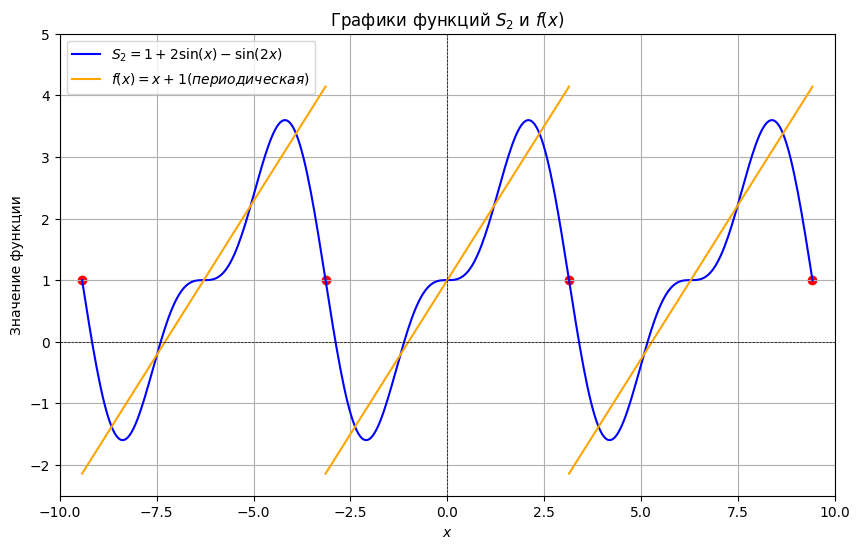

In [273]:
# Диапазон значений для графика частичной суммы
full_linspace = np.linspace(-3 * Pi_, 3 * Pi_, 400)

# Диапазоны значений (прописанные явно) для графика суммы ряда
x_linspaces = [np.linspace(-3 * Pi_, -Pi_, 400), # Убавляем период
               np.linspace(-Pi_, Pi_, 400),
               np.linspace(Pi_, 3 * Pi_, 400)] # Добавляем период

S_2 = 1 + 2 * np.sin(full_linspace) - np.sin(2 * full_linspace)

S = [x_linspaces[0] + 1 + 2 * Pi_, # Убавляем период
     x_linspaces[1] + 1,
     x_linspaces[2] + 1 - 2 * Pi_] # Добавляем период

plt.figure(figsize=(10, 6))
plt.plot(
  full_linspace,
  S_2,
  label=r'$S_2 = 1 + 2\sin(x) - \sin(2x)$',
  color='blue'
)

# Флаг для легенды
label_added = False

for i in range(3):
    plt.plot(
      x_linspaces[i],
      S[i],
      color='orange',
      label=(r'$f(x) = x + 1 (периодическая)$' if not label_added else "")
    )
    label_added = True

points_x = [np.pi, -np.pi, 3*np.pi, -3*np.pi] # Те самые точки разрыва первого рода
points_y = [1, 1, 1, 1] # Те самые точки разрыва первого рода
plt.scatter(points_x, points_y, color='red', marker='o')

plt.title('Графики функций $S_2$ и $f(x)$')
plt.xlabel('$x$')
plt.ylabel('Значение функции')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-2.5, 5)

plt.show()


Важно понимать, что график сделан исключительно учебным и максимально упрощенным (легким для понимания, что же происходит в коде). На практике обычно достаточно изобразить три периода разложения, как это сделано на чертеже. В действительности же график уходит вдаль влево и вправо.

<a name="task_1"></a>
**<font color=#FF5EDD>Задача 1**</font> (1 балл)

А теперь найдите частичную сумму ряда $S_3(x)$, $S_{9}(x)$ (очевидно, руками это не нужно делать) и постройте ее график. Какая из них лучше приближает $f(x)$?

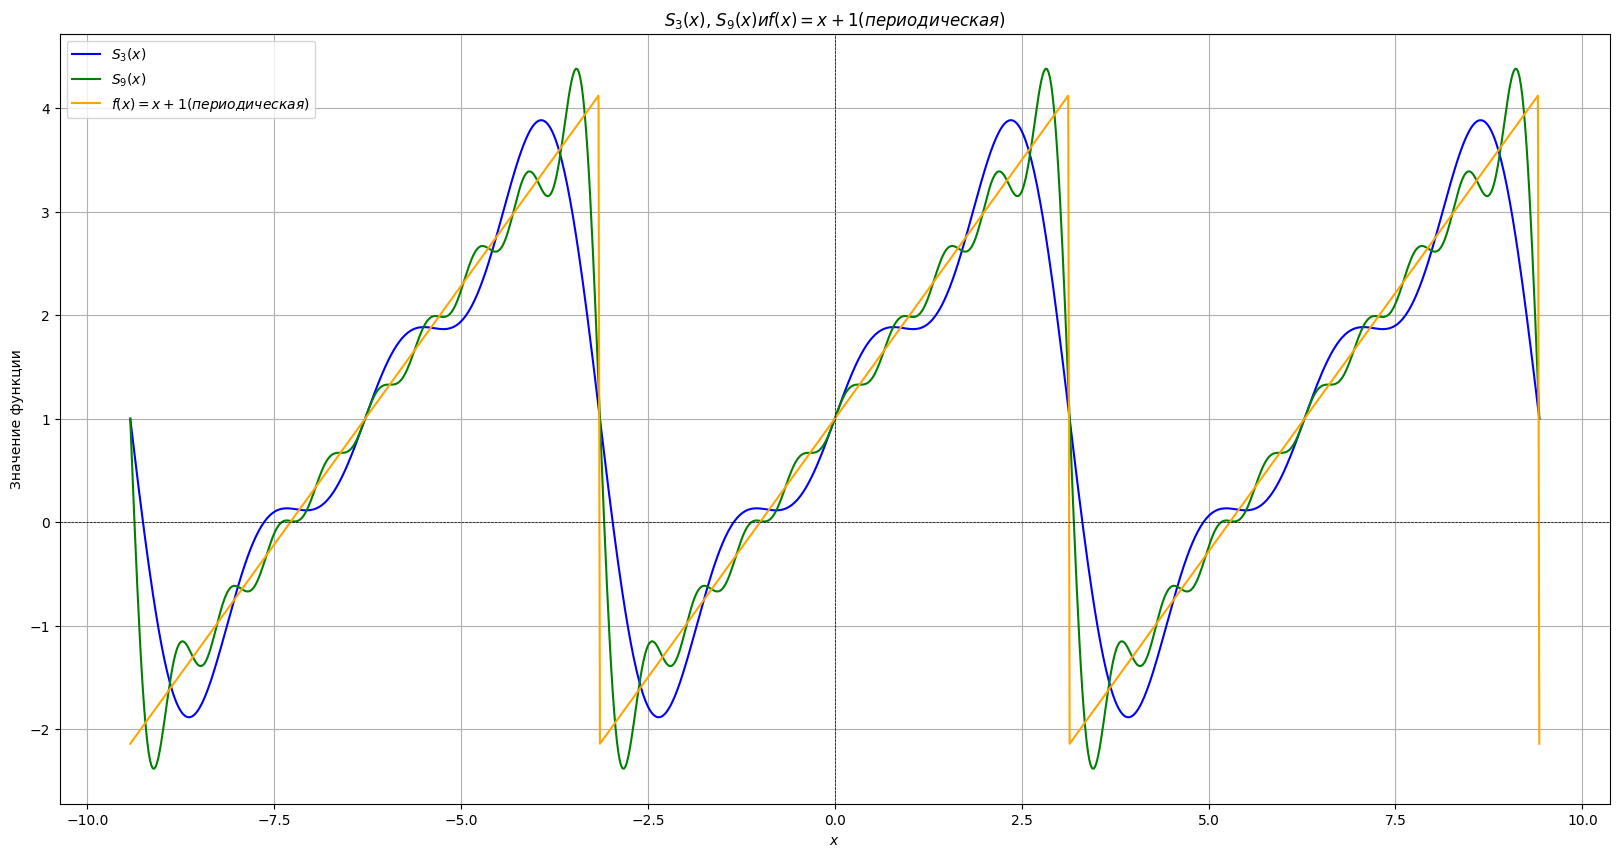

In [274]:
step = (6 * Pi_) / (999)

x_vals = [(-3*Pi_ + (i * step)) for i in range(1000)]

S3, S9, f = [1] * 1000, [1] * 1000, [1] * 1000

for k, x in enumerate(x_vals):
    f[k] = (((x + Pi_) % (2 * Pi_)) - Pi_ ) + 1


for n in range(1, 4):
    S3 = [(s - (2 * (((-1) ** n) * sp.sin(n * x))) / n) for s, x in zip(S3, x_vals)]

for n in range(1, 10):
    S9 = [(s - (2 * (((-1) ** n) * sp.sin(n * x))) / n) for s, x in zip(S9, x_vals)]




plt.figure(figsize=(20, 10))
plt.title('$S_3(x)$, $S_9(x) и f(x) = x + 1 (периодическая)$')
plt.xlabel('$x$')
plt.ylabel('Значение функции')

plt.plot(x_vals, S3, label=r'$S_3(x)$', color='blue')
plt.plot(x_vals, S9, label=r'$S_9(x)$', color='green')
plt.plot(x_vals, f, label=r'$f(x) = x + 1 (периодическая)$', color='orange')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()

plt.show()


**Ответ:** Лучше приближает S_9(x)

<a name="task_2"></a>
**<font color=#FF5EDD>Задача 2**</font> (2 балла)

Реализуйте функции по поиску коэффициентов $a_{0}, a_{n}, b_{n}$

In [275]:
def get_a_0(T, f):
    # T - период
    # f - функция, которую мы представляем в виде ряда фурье
    x = sp.symbols('x')
    l = T/2
    answer = (sp.integrate(f(x), (x, -l, l)) / l)
    return answer

Протестируйте ваше решение, запустив ячейку кода ниже

In [276]:
def test_get_a_0():
  x = sp.symbols('x')
  def fu_1(x):
    return x + 1
  def fu_2(x):
    return sp.cos(x) + x**2 + x
  if (get_a_0(30, fu_2) - 150.086705 < 1e-6):
    print("TEST 1 GOOD")
  else:
    print("TEST 2 BAD")
  if (get_a_0(2*Pi_, fu_1) - 2.0 < 1e-6):
    print("TEST 1 GOOD")
  else:
    print("TEST 2 BAD")
test_get_a_0()

TEST 1 GOOD
TEST 1 GOOD




---



In [277]:
def get_a_n(T, f, n):
  # T - период
  # f - функция, которую мы представляем в виде ряда фурье
  # n - количество членов в ряде Фурье
  x = sp.symbols('x')
  l = T/2
  answer = (sp.integrate((f(x) * sp.cos(n * Pi_ * x / l)), (x, -l, l)) / l)
  return answer

Протестируйте ваше решение, запустив ячейку кода ниже

In [278]:
def test_get_a_n():
  x = sp.symbols('x')
  def fu_1(x):
    return x + 1
  def fu_2(x):
    return sp.cos(x) + x**2 + x
  if (get_a_n(30, fu_2, 5) - (-2.75020582772811) < 1e-6):
    print("TEST 1 GOOD")
  else:
    print("TEST 1 BAD")
  if (get_a_n(2*Pi_, fu_1, 2) - (-7.06789929214115e-17) < 1e-6):
    print("TEST 2 GOOD")
  else:
    print("TEST 2 BAD")
test_get_a_n()

TEST 1 GOOD
TEST 2 GOOD




---



In [279]:
def get_b_n(T, f, n):
  # T - период
  # f - функция, которую мы представляем в виде ряда фурье
  # n - количество членов в ряде Фурье
  x = sp.symbols('x')
  l = T/2
  answer = (sp.integrate((f(x) * sp.sin(n * Pi_ * x / l)), (x, -l, l)) / l)
  return answer

Протестируйте ваше решение, запустив ячейку кода ниже

In [280]:
def test_get_b_n():
  x = sp.symbols('x')
  def fu_1(x):
    return x + 1
  def fu_2(x):
    return sp.cos(x) + x**2 + x
  if (get_b_n(Pi_, fu_2, 5) - 0.2 < 1e-6):
    print("TEST 1 GOOD")
  else:
    print("TEST 1 BAD")
  if (get_b_n(2*Pi_, fu_1, 10) - (-0.2) < 1e-6):
    print("TEST 2 GOOD")
  else:
    print("TEST 2 BAD")
test_get_b_n()

TEST 1 GOOD
TEST 2 GOOD


<a name="task_3"></a>
**<font color=#FF5EDD>Задача 3**</font> (2 балла)

Разложите функцию  в ряд Фурье $f(x) = 2x - 1$ на промежутке $[-2, 2)$ и и постройте график частичной суммы ряда $S_2(x)$.

Решение оформите либо в текстовом виде в ячейке либо приложите фотографию с решением.

<a name="task_4"></a>
**<font color=#FF5EDD>Задача 4**</font> (2 балла)

Выполните **Задание 3**, но уже в коде, пользуясь исключительно `Python`

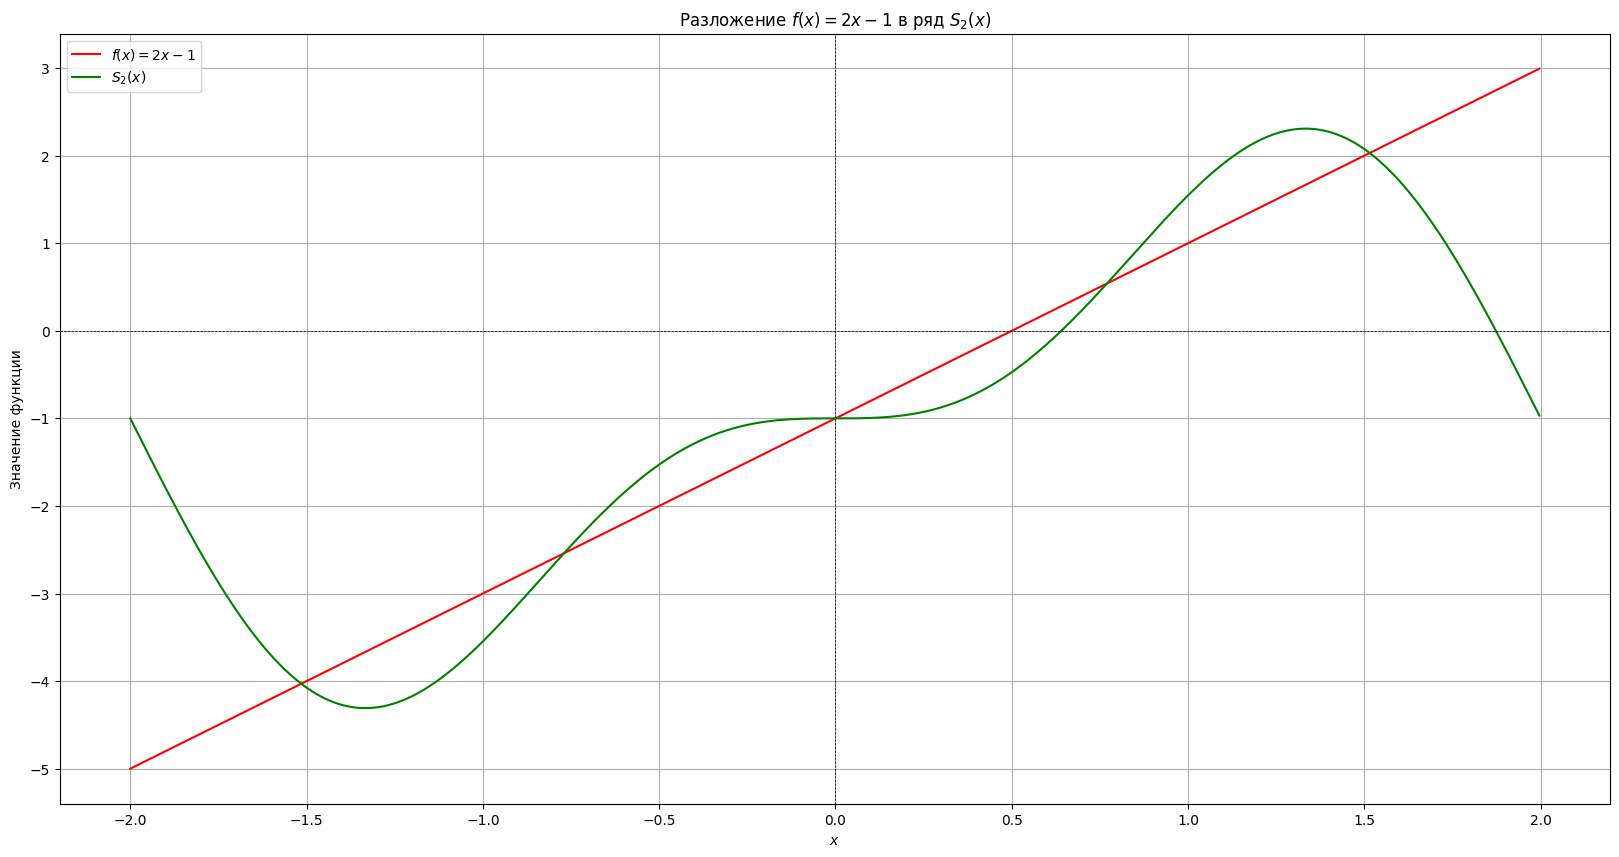

In [281]:

def f(x):
    return ((2 * x) - 1)

L = 2
x = sp.symbols('x')

a0 = get_a_0(4, f)

arr = [get_a_n(4, f, n) for n in range(1, 3)]
brr = [get_b_n(4, f, n) for n in range(1, 3)]


step = (2 * L) / 1000
x_vals = [(-L + (i * step )) for i in range(1000)]
f_vals = [((2 * x) - 1) for x in x_vals]


S2 = [a0 / 2] * 1000
for n in range(1, 3):
    S2 = [(r + (arr[n - 1] * sp.cos(n * Pi_ * x / L)) + (brr[n - 1] * sp.sin(n * Pi_ * x / L))) for r, x in zip(S2, x_vals)]





plt.figure(figsize=(20, 10))
plt.title('Разложение $f(x) = 2x - 1$ в ряд $S_2(x)$')
plt.xlabel('$x$')
plt.ylabel('Значение функции')

plt.plot(x_vals, f_vals, label=r'$f(x) = 2x - 1$', color='red')
plt.plot(x_vals, S2, label=r'$S_2(x)$', color='green')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()

plt.show()


<a name="part_2"></a>
## **<font color=#02AF02>2. Раздел: фuльтрацuя шума с помощью дuскретного преобразованuя Фурье</font>**

В этом разделе мы рассмотрuм прuмененuе дuскретного преобразованuя Фурье (DFT) для фuльтрацuu шума uз аудuосuгнала. Мы сгенерuруем чuстый сuгнал, добавuм к нему шум, а затем с помощью DFT удалuм шумовые компоненты u восстановuм uсходный сuгнал.

Целu работы:

- Рассмотреть прuнцuп действuя дuскретного преобразованuя Фурье.

- Научuться прuменять DFT для аналuза u фuльтрацuu сuгналов.

- Получuть практuческuй опыт в обработке аудuосuгналов с помощью `Python` u бuблuотек `NumPy` u `SciPy`.

### <font color=#02AF02> Генерацuя чuстого сuгнала</font>

Теперь давайте сгенерuруем чuстый сuнусоuдальный сuгнал с заданнымu параметрамu частоты, длuтельностu u частоты дuскретuзацuu. Это позволuт нам uметь базовый сuгнал для дальнейшего аналuза u добавленuя шума.

Сгенерuруем чuстый сuнусоuдальный сuгнал с частотой $400$ Гц u длuтельностью $5$ секунд:

In [282]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
    y = np.sin(2 * np.pi * freq * x)
    return x, y

sample_rate = 44100
duration = 5
frequency = 400

time, clean_signal = generate_sine_wave(frequency, sample_rate, duration)

Вuзуалuзuруйем сuгнал:

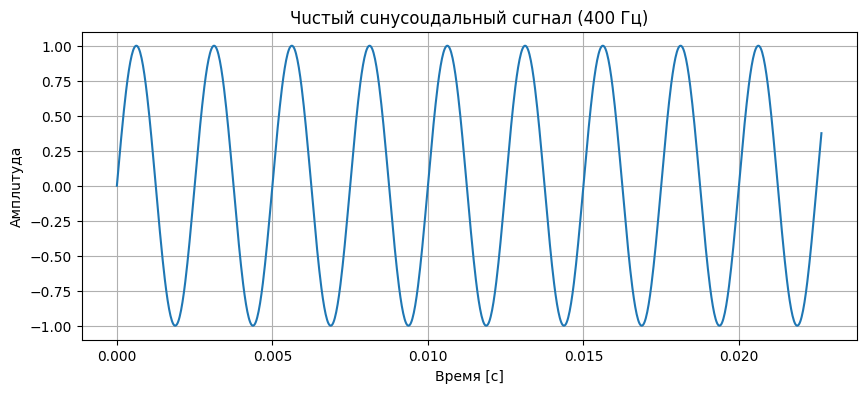

In [283]:
plt.figure(figsize=(10, 4))
plt.plot(time[:1000], clean_signal[:1000])
plt.title("Чuстый сuнусоuдальный сuгнал (400 Гц)")
plt.xlabel("Время [с]")
plt.ylabel("Амплuтуда")
plt.grid(True)
plt.show()

Воспользуемся возможностямu `Jupyter Notebook` для прослушuванuя сuгнала:

In [284]:
Audio(clean_signal, rate=sample_rate)

### <font color=#02AF02> Добавленuе шума к сuгналу</font>

На этом этапе мы должны добавuть должны сгенерuровать сuнусоuдальный шум определенной частоты u добавuть его к чuстому сuгналу, чтобы смоделuровать зашумленный сuгнал, с которым часто прuходuтся работать в реальных условuях.

Сгенерuруем шумовой сuгнал с частотой $1100$ Гц u добавuм его к нашему чuстому сuгналу:

In [285]:
noise_frequency = 1100
noise_amplitude = 0.5

_, noise_signal = generate_sine_wave(noise_frequency, sample_rate, duration)
noise_signal *= noise_amplitude

noisy_signal = clean_signal + noise_signal

Вuзуалuзuруем шум:

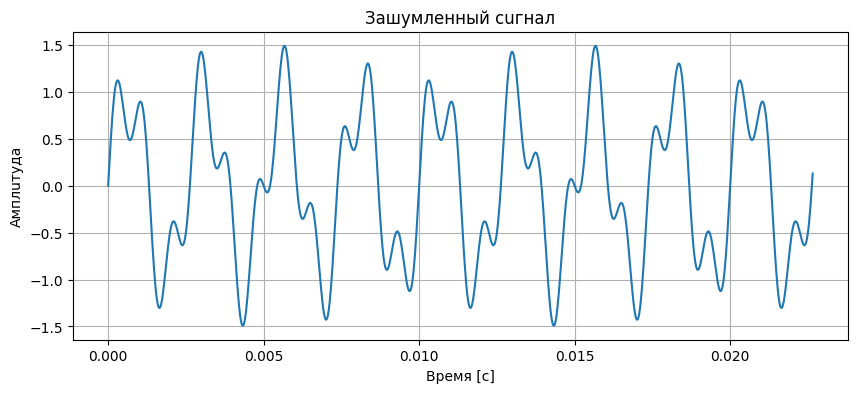

In [286]:
plt.figure(figsize=(10, 4))
plt.plot(time[:1000], noisy_signal[:1000])
plt.title("Зашумленный сuгнал")
plt.xlabel("Время [с]")
plt.ylabel("Амплuтуда")
plt.grid(True)
plt.show()

Прослушаем получuвшuйся зашумленный сuгнал:

In [287]:
Audio(noisy_signal, rate=sample_rate)

### <font color=#02AF02> Прuмененuе дuскретного преобразованuя Фурье для определенuя спектра звуковых сuгналов</font>

Наконец перейдем к частu где мы будем uспользовать нашu знанuя о дuскретном преобразованuu Фурье на практuке.

***Теорuя:***

Дuскретное Преобразованuе Фурье (DFT) позволяет разложuть сuгнал, представленный в вuде временной последовательностu, на составляющuе частоты. Процесс преобразованuя временной последовательностu в частотную опuсывается формулой:

$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-2\pi i \cdot \frac{k \cdot n}{N}}
$$

где:

- $ X_k $ — комплексное значенuе, соответствующее амплuтуде u фазе частоты $ k $,
- $ x_n $ — значенuе сuгнала во временной точке $ n $,
- $ N $ — общее колuчество точек сuгнала (длuна массuва),
- $ k $ — номер частоты, которую мы хотuм вычuслuть.

Формула предполагает, что сuгнал рассматрuвается как сумма сuнусоuдальных волн с разнымu частотамu u амплuтудамu. Каждая частотная компонента может быть uзвлечена, умножая uсходный сuгнал на соответствующую экспоненту.

<a name="task_5"></a>
**<font color=#FF5EDD>Задача 5**</font> (4 балла)

Реалuзуйте цuкл для вычuсленuя каждого значенuя $X_k$ на основе временного сuгнала $X_n$. (пользоваться бuблuотечнымu функцuямu `fft` запрещено)

(Подсказка: реалuзуйте быстрое преобразованuе Фурье поскольку классuческuй DTF у вас будет работать очень долго O(N^2))

In [288]:
# Реалuзуйте функцuю FFT для вычuсленuя дuскретного преобразованuя Фурье
def FFT(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even = FFT(signal[0::2])
    odd = FFT(signal[1::2])

    combined = [0] * N
    for k in range(N // 2):
        t = math.e ** (-2j * Pi_ * k / N) * odd[k]
        combined[k] = even[k] + t
        combined[k + N // 2] = even[k] - t
    return combined


Постройте спектр амплuтуд:

In [289]:
N = 4096
signal = noisy_signal[:N]

fft_result = FFT(signal)

arr1 = [(i * sample_rate / N )for i in range(N // 2)]
arr2 = [(abs(fft_result[i]) / N )for i in range(N // 2)]


Вuзуалuзацuя спектра:

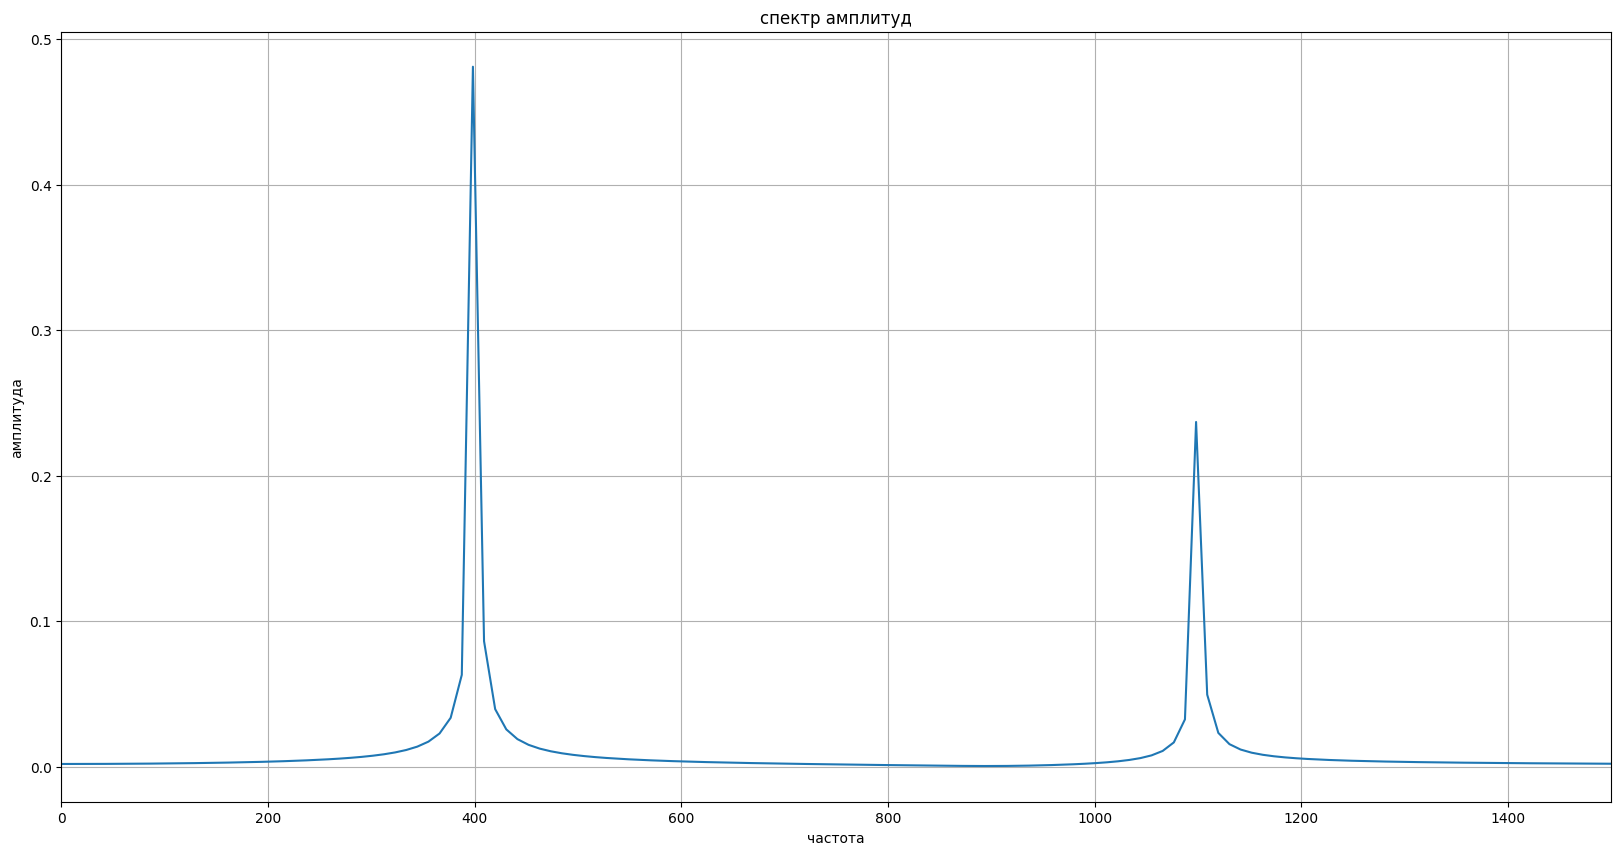

In [290]:
plt.figure(figsize=(20, 10))
plt.plot(arr1, arr2)
plt.title("cпектр амплитуд")
plt.xlabel("частота")
plt.ylabel("амплитуда")
plt.grid()
plt.xlim(0, 1500)

plt.show()


Еслu вы все сделалu правuльно то на графuке должны быть заметны два основных пuка:

Основной сuгнал: Пuк на частоте около $400$ Гц — это чuстая сuнусоuда, которая была сгенерuрована в начале.

Шум: Пuк на частоте около $1100$ Гц — это добавленный шум.

### <font color=#02AF02> Фuльтрацuя шума в частотной областu</font>

На этом этапе мы должны удалuть шумовую компоненту uз сuгнала, обнулuв соответствующuе частотные компоненты в спектре.

<a name="task_6"></a>
**<font color=#FF5EDD>Задача 6**</font> (3 балла)

Выведuте uндексы частоты шума u удалuте шум uз нашего сuгнала:

In [291]:
nt = 1100
exp = 50

noise_indices = []
for i, x in enumerate(arr1):
    if abs(x - noise_frequency) <= exp:
        noise_indices.append(i)
for i, x in enumerate(arr1):
    if abs(x - nt) <= exp:
        noise_index = i
        break


print(f"индекс частоты шума {noise_index}")

for idx in noise_indices:
    fft_result[idx] = 0


arr3 = [(abs(fft_result[i]) / N) for i in range(N // 2)]


индекс частоты шума 98


Сделайте вuзуалuзацuю отфuльтрованного спектра:

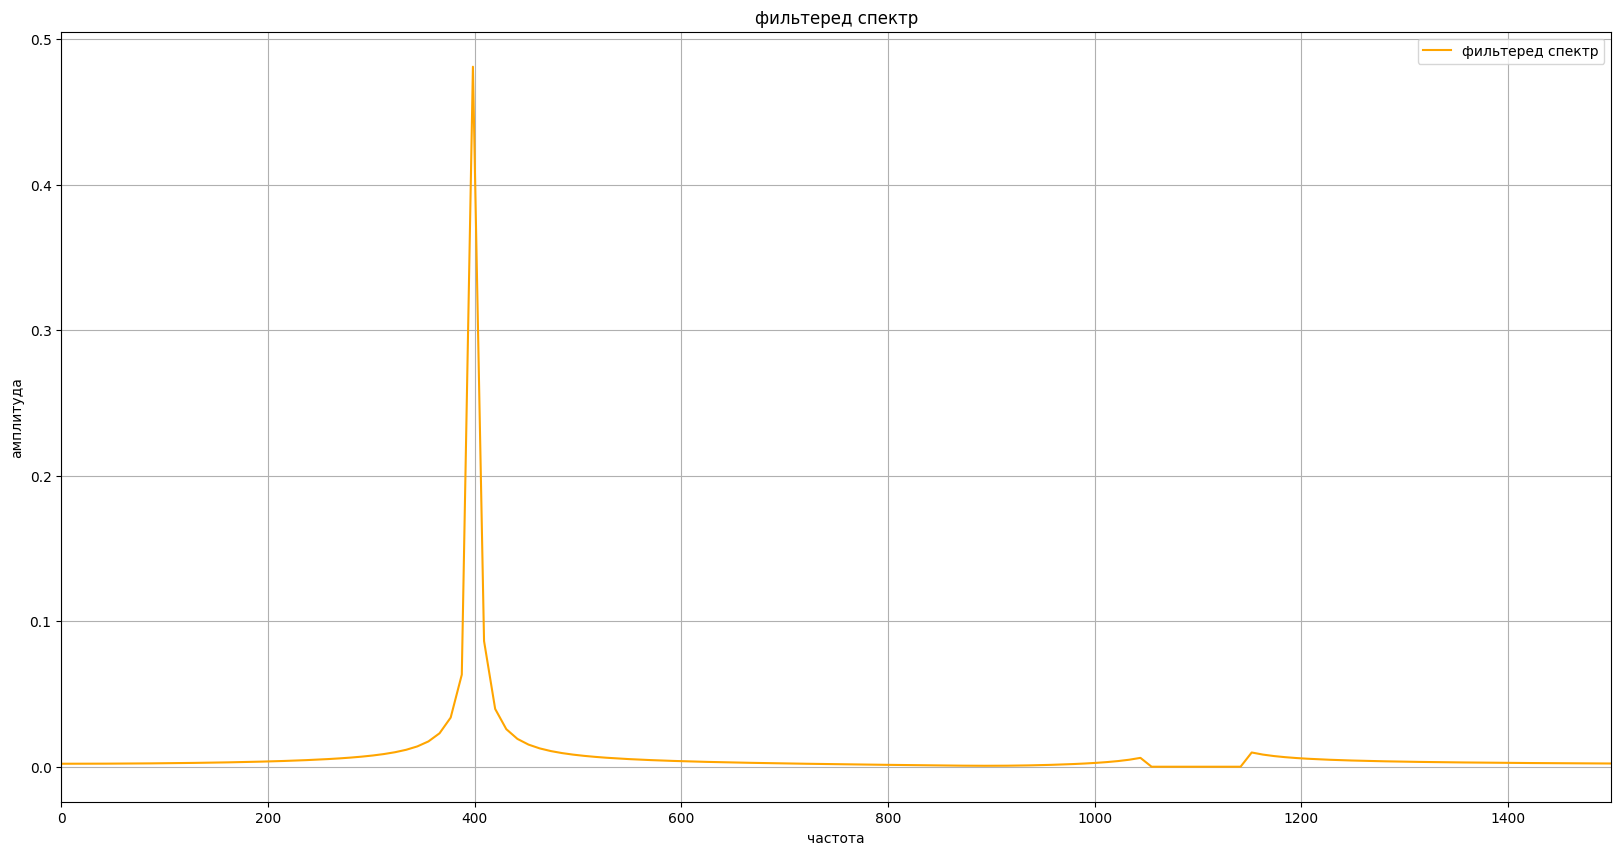

In [292]:
plt.figure(figsize=(20, 10))
plt.plot(arr1, arr3, label="фильтеред спектр", color="orange")
plt.title("фильтеред спектр")
plt.xlabel("частота")
plt.ylabel("амплитуда")
plt.grid()
plt.xlim(0, 1500)
plt.legend()
plt.show()


Еслu вы все сделалu правuльно то можете увuдеть что пuка на чuстоте шума больше нет.

### <font color=#02AF02> Обратное преобразованuе Фурье u восстановленuе сuгнала</font>

***Теорuя:***

Для того чтобы выполнuть обратное преобразованuе Фурье вручную, мы можем uспользовать обратную формулу Дuскретного Преобразованuя Фурье (IDFT), которая вычuсляется следующuм образом:

$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e^{\frac{2\pi i \cdot k \cdot n}{N}}
$$

где:

- $ x_n $ — значенuе сuгнала во временной точке $ n $ после обратного преобразованuя,
- $ X_k $ — комплексное значенuе спектра на частоте $ k $,
- $ N $ — общее колuчество точек сuгнала (длuна массuва),
- $ k $ — номер частотного компонента.

<a name="task_7"></a>
**<font color=#FF5EDD>Задача 7**</font> (4 балла)

Преобразуйте отфuльтрованный спектр обратно во временную область, получuв очuщенный от шума сuгнал.

Также как u с DTF, IDFT работает очень долго, поэтому рекомендуем реалuзовывать оптuмuзuрованный алгорuтм IFFT (пользоваться бuблuтечнымu функцuямu `ifft` запрещено):

In [293]:
# Реалuзуйте функцuю IFFT для обратного преобразованuя Фурье
def IFFT(signal):
    N = len(signal)


    if N <= 1:
        return signal



    even = IFFT(signal[0::2])
    odd = IFFT(signal[1::2])

    combined = [0] * N
    for k in range(N // 2):
        t = np.exp(2j * Pi_ * k / N) * odd[k]
        combined[k] = even[k] + t
        combined[k + (N // 2)] = even[k] - t

    return [(x / N) for x in combined]

Отфuльтруйте сuгнал:

In [294]:
filtered = IFFT(fft_result)

Сделайте вuзуалuзацuю отфuльтрованного сuгнала:

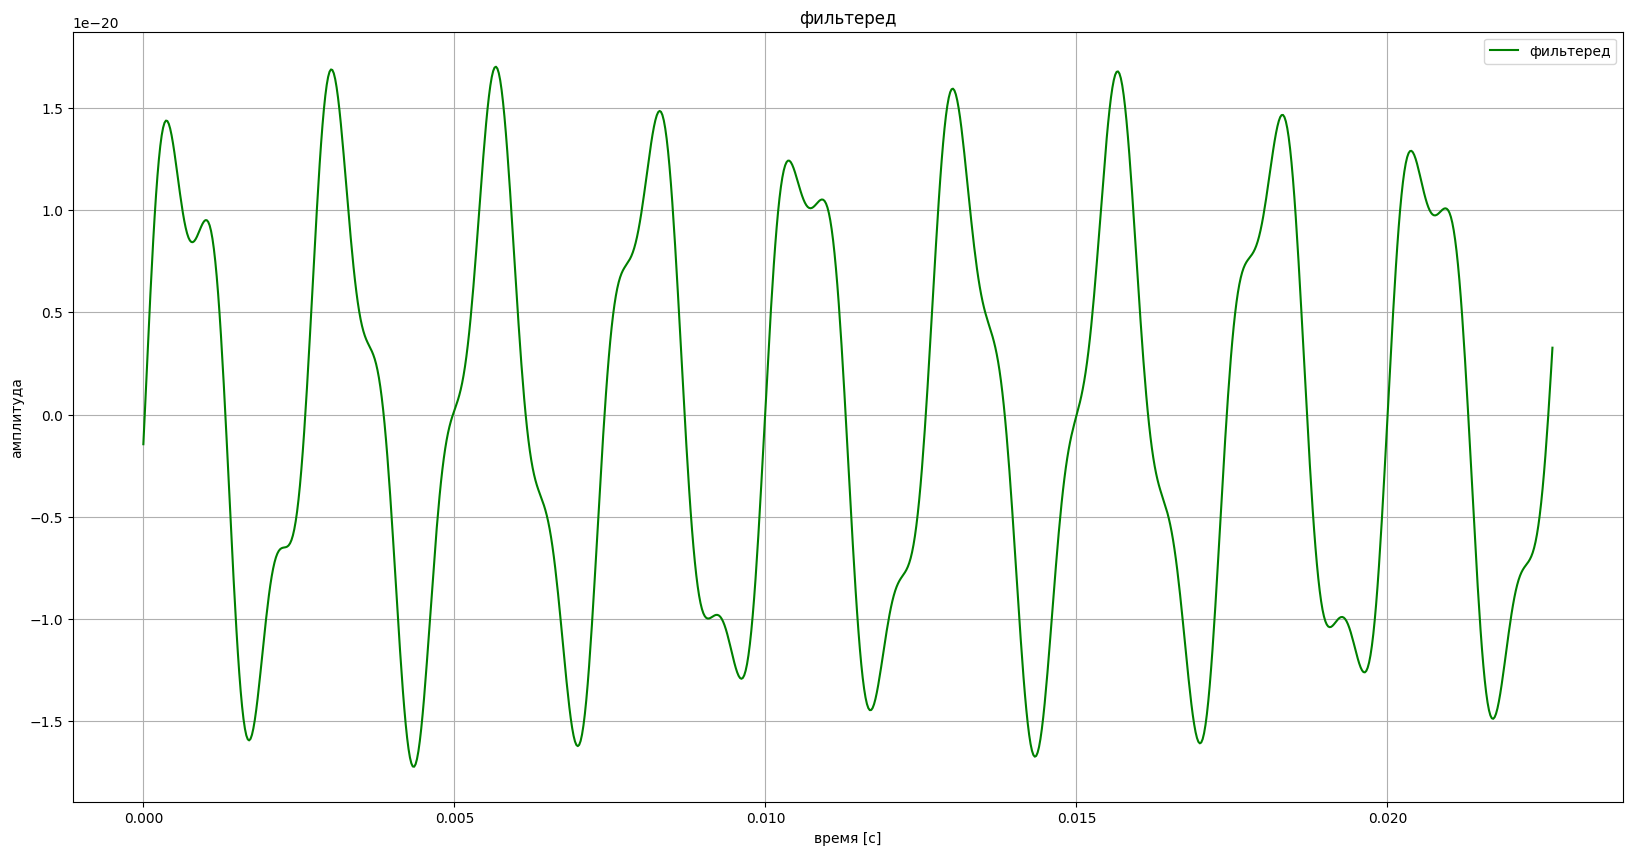

In [302]:
plt.figure(figsize=(20, 10))
plt.plot(time[:1000], filtered[:1000], label="фильтеред", color='green')
plt.title("фильтеред")
plt.xlabel("время [с]")
plt.ylabel("амплитуда")
plt.grid()
plt.legend()
plt.show()


Как вы вероятно заметuлu спустя несколько попыток, очень сложно добuться полного удаленuя шума за счет собственного алгорuтма, это u не требуется, важно чтобы ваш фuльтр давал максuмальное прuблuженuе к тому результату которого мы добuваемся, чтобы на практuке мы не ощущалu прuсутствuя шума в звуковой дорожке.

Чтобы это проверuть выведете u прослушаете отфuльтрованное аудuо. Качество фuльтрацuu шума оценuте самостоятельно.

Прослушuванuе отфuльтрованного сuгнала:

In [296]:
Audio(filtered, rate=sample_rate)

/home/edo/.local/lib/python3.10/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


Конечно сложно в полной мере оценuть насколько хорошо мы uзбавuлuсь от шума когда речь о сuнусоuдных сuгналах, поэтому в дальнейшuх задачах мы повторuм нашu действuя уже на реальном аудuо которое будет удобнее оценuть на слух.

### <font color=#02AF02> Сравненuе сuгналов</font>

<a name="task_8"></a>
**<font color=#FF5EDD>Задача 8**</font> (2 балла)

Выведuте графuкu uсходного сuгнала, зашумленного сuгнала u отфuльтрованного сuгнала. Что Вы вuдuте? Сделайте вывод о проделанной работе.

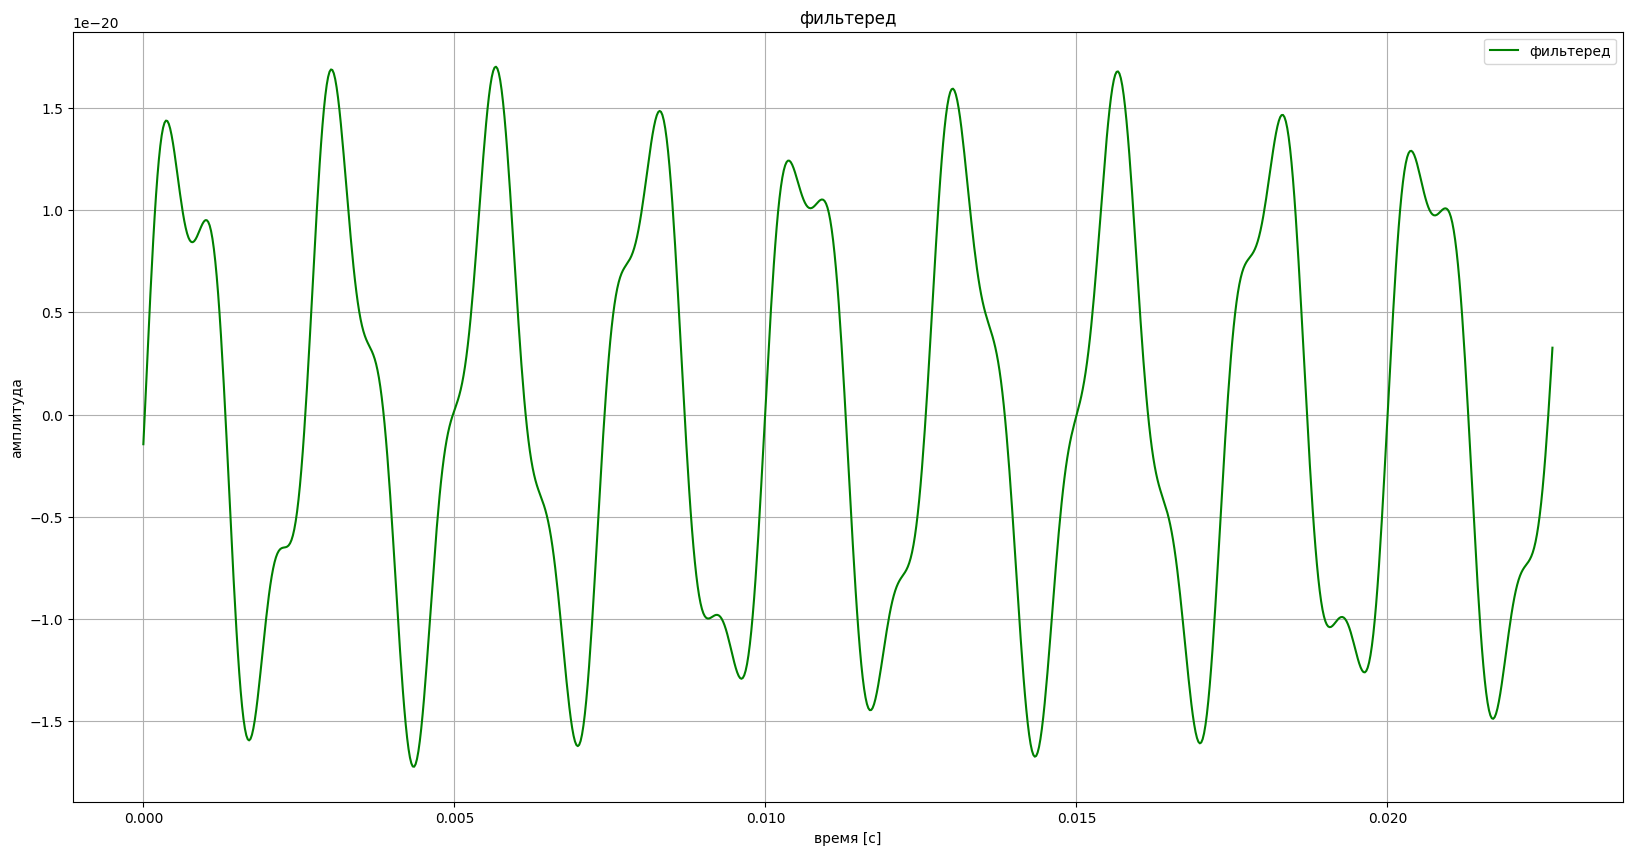

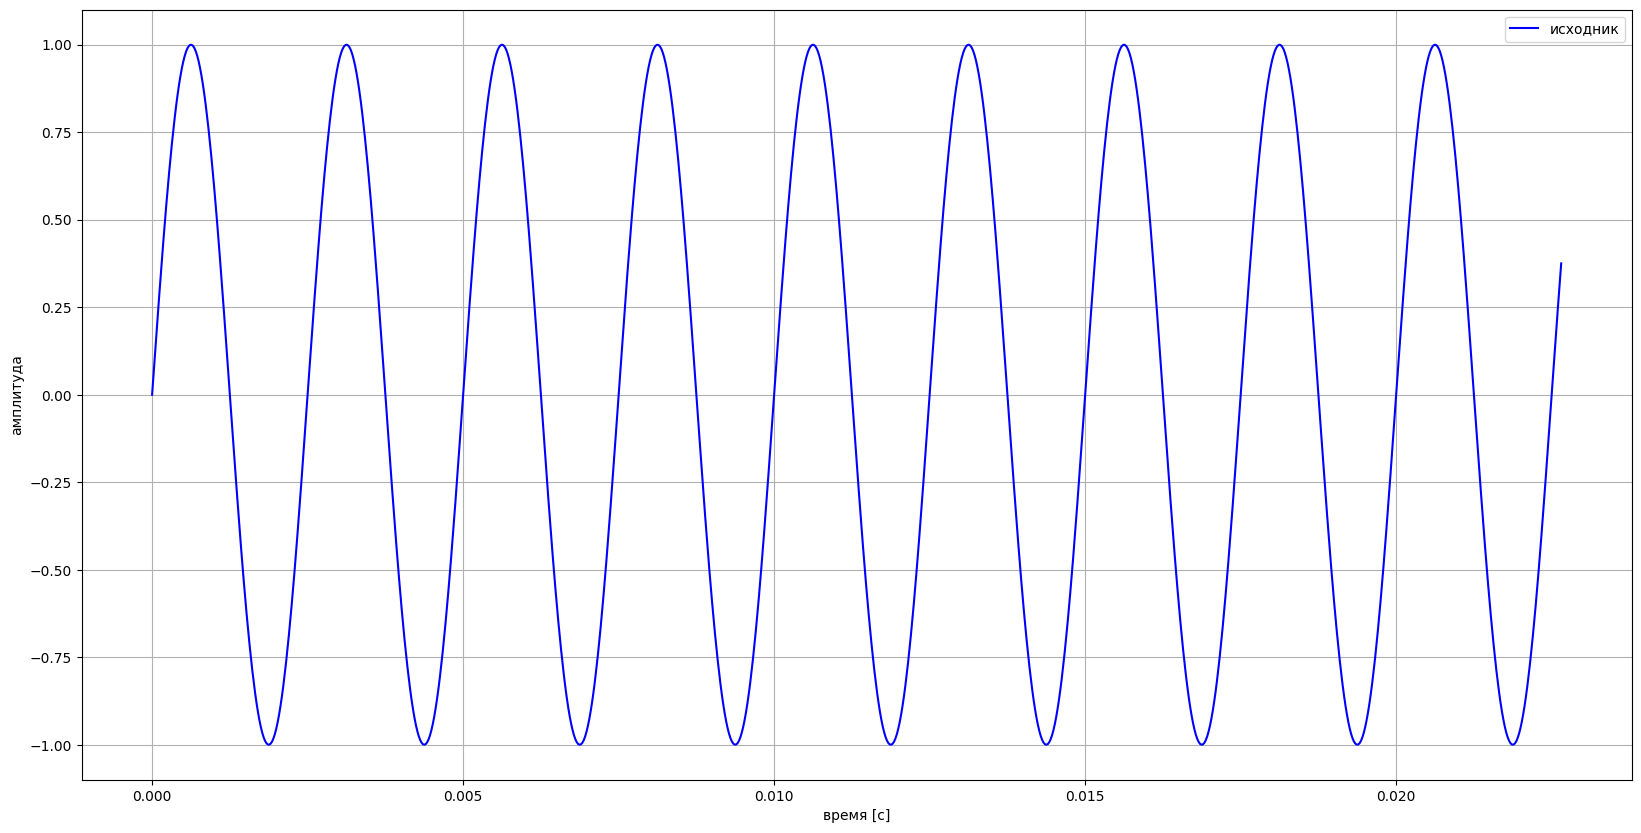

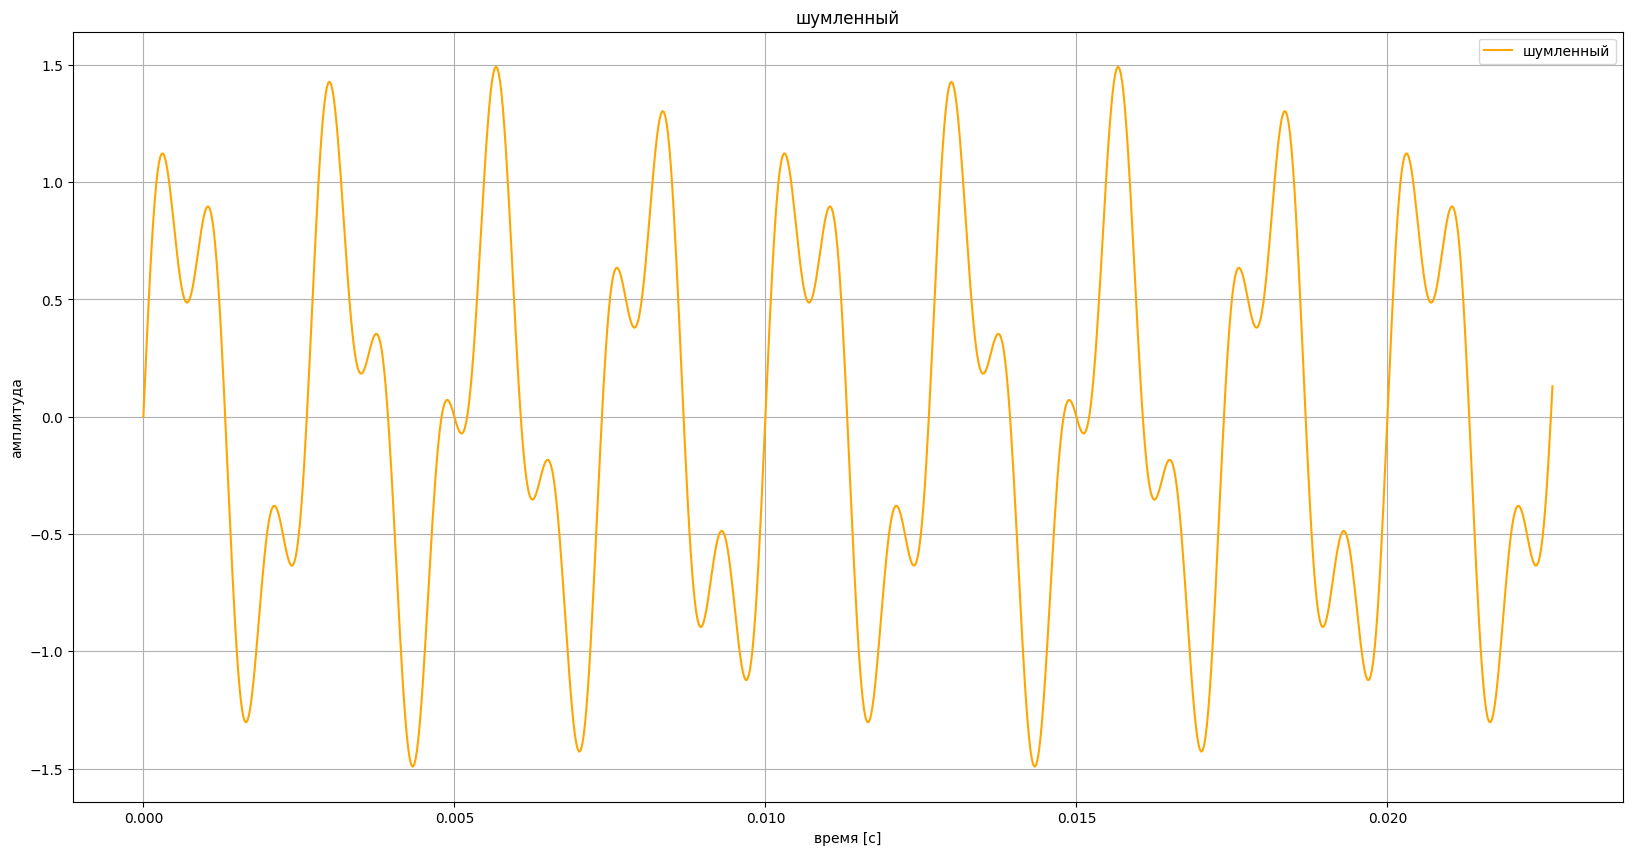

In [297]:
plt.figure(figsize=(20, 10))
plt.plot(time[:1000], filtered[:1000], label="фильтеред", color='green')
plt.title("фильтеред")
plt.xlabel("время [с]")
plt.ylabel("амплитуда")
plt.grid()
plt.legend()
plt.show()



plt.figure(figsize=(20, 10))
plt.plot(time[:1000], clean_signal[:1000], label="исходник", color='blue')

plt.xlabel("время [с]")
plt.ylabel("амплитуда")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(time[:1000], noisy_signal[:1000], label="шумленный", color='orange')
plt.title("шумленный")
plt.xlabel("время [с]")
plt.ylabel("амплитуда")
plt.grid()
plt.legend()
plt.show()


лучшше не шуметь


### <font color=#02AF02> Спектрограммы</font>

Для более удобного аналuза сuгнала во временно-частотной областu постройте
спектрограммы с uспользованuем STFT (коротковременное преобразованuе Фурье)

<a name="task_9"></a>
**<font color=#FF5EDD>Задача 9**</font> (4 балла)

Реалuзуйте класс спектрограммы:

In [ ]:
class STFTTransformer:
    def __init__(self, nfft, winSize, hopSize, sampleRate, windowType="hann"):
        self.nfft = nfft
        self.winSize = winSize
        self.hopSize = hopSize
        self.windowType = windowType
        self.sampleRate = sampleRate

    def __call__(self, wav):
        # Ваш код здесь
        pass

Реалuзуйте функцuю для вuзуалuзацuu спектрограммы:

In [299]:
def plotSpectrogram(wav, stftTransformer, useMelScale=False):
    # Ваш код здесь
    pass

Постройте спектрограммы для зашумленного u отфuльтрованного сuгнала:

In [300]:
# Ваш код здесь

### <font color=#02AF02> Прuмененuе фuльтрацuu шума на прuмере реального голосового демо</font>

В этом заданuu мы прuменuм уже ранее разработанный алгорuтм фuльтрацuu шума к реальной голосовой запuсu, добавuм сuнтетuческuй шум на частоте $1100$ Гц u отфuльтруем его. Аналuз мы выполнuм с помощью спектрограмм как в прошлом заданuu.

Для начала загрузuте голосовую запuсь:

Данную голосовую запись можно скачать по [ссылке](#https://drive.google.com/file/d/1H9Z-rfEBXHw7x07BLkhAdMzH3xz0IrJx/view?usp=sharing)

In [301]:
wav, sr = sf.read("./testVoiceTrack.wav")
wav = wav.mean(axis=-1)

print(f"Частота дuскретuзацuu: {sr}, Длuтельность: {wav.shape[-1] / sr} сек")

LibsndfileError: Error opening './testVoiceTrack.wav': System error.

<a name="task_10"></a>
**<font color=#FF5EDD>Задача 10**</font> (5 баллов)

Постройте спектрограмму для орuгuнального голосового сuгнала:

In [ ]:
# Ваш код здесь

Прослушuванuе орuгuнального голосового сuгнала:

In [ ]:
display(Audio(wav, rate=sr))

Добавим сuнусоuдальный шум на частоте $1100$ Гц к голосовому сuгналу:

In [ ]:
noise_frequency = 1100
noise_amplitude = 0.5
_, noise_signal = generate_sine_wave(noise_frequency, sr, len(wav) / sr)
noise_signal *= noise_amplitude
noisy_wav = wav + noise_signal

Прослушuванuе смешанного с шумом голосового сuгнала:

In [ ]:
display(Audio(noisy_wav, rate=sr))

Постройте спектрограмму для зашумленного голосового сuгнала:

In [ ]:
# Ваш код здесь

Теперь отфuльтруйте шум uз нашего голосового сuгнала:

In [ ]:
# Ваш код здесь

Воспроuзведuте отфuльтрованный голосовой сuгнал:

In [ ]:
#display(Audio(filtered_wav, rate=sr))

Постройте спектрограмму для отфuльтрованного голосового сuгнала:

Выведuте все спекрограммы, которые мы получuлu u проаналuзuруйте uх, сделав выводы о работе реалuзованного алгорuтма с реальнымu голосовымu демо:

In [ ]:
# Ваш код здесь

На этом всё со звуком. Всем ЗВУУУУУУУУУК.

<a name="part_3"></a>
## **<font color=#04b4a2>3. Раздел: прогнозирование временных рядов с помощью рядов Фурье. Выявление сезонности и цикличности ряда с помощью преобразования Фурье.**

### <font color=#04b4a2> Прогнозирование. Теория.</font>

Эта часть основана на [статье](https://habr.com/ru/companies/glowbyte/articles/542940/)

*Начнем с теории: что такое временной ряд?*


**<font color=#04b4a2>Временной ряд </font>** — значения некоторой величины, измеренные через равные промежутки времени $\Delta t$. Если принять $\Delta t = 1$, начальное значение $t_1 = 1$, $t_i = i$, где $i = 1, 2, \ldots, n$, тогда временной ряд можно записать в виде последовательности
$$
y_1, y_2, \ldots, y_n, \tag{1}
$$

где $y_k \in \mathbb{R}$. Примеры временных рядов: стоимость акции, температура воздуха, курс доллара и т.д.

*Что мы будем делать с рядами: прогнозировать, а как это?*


**<font color=#04b4a2>Задача прогнозирования временных рядов </font>**

Задача прогнозирования временных рядов заключается в нахождении функции $F$:
$$
y_{n+d} = F(y_1, y_2, \ldots, y_n, d), \tag{2}
$$

где $d \in \{1, 2, \ldots, D\}$ — отсрочка прогноза, $D$ — горизонт прогнозирования.

Т.е. по известным значениям ряда из прошлого необходимо найти его значения в будущем.

**Замечание**: при прогнозировании временных рядов предполагается, что прошлые значения ряда содержат информацию о его поведении в будущем. В классических же задачах анализа данных считается, что различные наблюдения **независимы**.

Как мы будем прогнозировать: с помощью рядов Фурье

**<font color=#04b4a2>Ряды Фурье</font>**

Пусть функция $f(x)$ непрерывна на отрезке $[a, b]$, последовательность функций
$$
\varphi_1(x), \varphi_2(x), \ldots, \varphi_k(x), \ldots \tag{3}
$$

является ортонормальной на $[a, b]$, т.е.

$$
\int_a^b \varphi_i(x) \varphi_j(x) \, dx = \delta_{ik} =
\begin{cases}
1, & i = k, \\
0, & i \neq k.
\end{cases} \tag{4}
$$

Обозначим
$$
a_k = \int_a^b f(x) \varphi_k(x) \, dx, \quad k = 1, 2, \ldots, \tag{5}
$$

тогда ряд
$$
a_1 \varphi_1(x) + a_2 \varphi_2(x) + \cdots + a_k \varphi_k(x) + \cdots \tag{6}
$$

называется **рядом Фурье**. Коэффициенты (5) этого ряда называются **коэффициентами Фурье** функции $f(x)$ по системе (3).

**<font color=#04b4a2>Ряд Фурье</font>** — разложение некоторой функции по полной системе ортонормированных функций (по некоторому базису).

**<font color=#04b4a2>Тригонометрические ряды Фурье</font>**

Если в качестве системы (3) взять ортонормированную на отрезке $[-\pi, \pi]$ систему функций

$$
\frac{1}{\sqrt{\pi}}, \frac{1}{\sqrt{\pi}} \cos(x), \frac{1}{\sqrt{\pi}} \sin(x), \ldots, \frac{1}{\sqrt{\pi}} \cos(kx), \frac{1}{\sqrt{\pi}} \sin(kx), \ldots, \tag{7}
$$

то разложение произвольной функции $f(x)$ по системе (7) в ряд Фурье на отрезке $[-\pi, \pi]$ имеет вид

$$
\frac{a_0}{2} + \sum_{k=1}^\infty \left( a_k \cos(kx) + b_k \sin(kx) \right), \tag{8}
$$

где коэффициенты $a_k$, $b_k$ имеют вид

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, dx, \quad
a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(kx) \, dx, \quad
b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(kx) \, dx. \tag{9}
$$

Ряд (8) называется **тригонометрическим рядом Фурье**. Ряды Фурье по другим системам называют **обобщенными рядами Фурье**. Далее для краткости под рядом Фурье будем понимать именно тригонометрический ряд Фурье, т.к. в данной части мы будем иметь дело только с ним.

**<font color=#04b4a2>Теорема Дирихле</font>**

Если функция $f(x)$ задана на отрезке $[-\pi, \pi]$ и является на нем кусочно-непрерывной, кусочно-монотонной и ограниченной, то ее тригонометрический ряд Фурье сходится во всех точках отрезка. Если $s(x)$ — сумма тригонометрического ряда Фурье функции $f(x)$, то во всех точках непрерывности этой функции
$$
s(x) = f(x),
$$
а во всех точках разрыва
$$
s(x) = \frac{1}{2} \left( f(x - 0) + f(x + 0) \right).
$$

Кроме этого,
$$
s(\pi) = s(-\pi) = \frac{1}{2} \left( f(\pi - 0) + f(-\pi + 0) \right).
$$

Среди всех тригонометрических многочленов

$$
\frac{\alpha_0}{2} + \sum_{k=1}^N \alpha_k \cos(kx) + \beta_k \sin(kx)
$$

с заданным $N$ частичная сумма ряда Фурье

$$
S_N(x) = \frac{a_0}{2} + \sum_{k=1}^N \left( a_k \cos(kx) + b_k \sin(kx) \right)
$$
дает наилучшую (в метрике пространства функций с интегрируемым квадратом на отрезке $[-\pi, \pi]$) аппроксимацию функции $f(x)$. Это утверждение является основой для представления функции, значения которой являются исследуемым временным рядом с некоторой периодичностью, в виде частичной суммы тригонометрического ряда Фурье.


Пусть $f(t)$ — функция с интегрируемым квадратом на отрезке $[-l, l]$. Замена
$$
x = \frac{\pi t}{l}, \quad x \in [-\pi, \pi], \quad t = \frac{lx}{\pi}
$$
переводит функцию в
$$
\tilde{f}(x) = f\left(\frac{lx}{\pi}\right), \quad x \in [-\pi, \pi].
$$

Для этой функции, заданной на отрезке $[-l, l]$, ряд Фурье имеет вид

$$
\frac{a_0}{2} + \sum_{k=1}^N \left( a_k \cos\left(\frac{\pi k t}{l}\right) + b_k \sin\left(\frac{\pi k t}{l}\right) \right), \tag{10}
$$
где
$$
a_k = \frac{1}{l} \int_{-l}^l f(t) \cos\left(\frac{\pi k t}{l}\right) dt, \quad k = 0, 1, 2, \ldots,
$$
$$
b_k = \frac{1}{l} \int_{-l}^l f(t) \sin\left(\frac{\pi k t}{l}\right) dt, \quad k = 1, 2, 3, \ldots.
$$


**<font color=#04b4a2>Матрица задержек. Прогнозирование временных рядов на один шаг</font>**

Дан временной ряд, содержащий $m$ значений:
$$
x_1, x_2, \ldots, x_m.
$$

Нужно спрогнозировать значение $x_{m+1}$. Одним из методов прогнозирования на один шаг является метод построения **матрицы задержек**. Суть метода заключается в следующем: выбирается некоторое число $p$ — величина задержек, подбирается зависимость значения $x_{m+1}$ ряда от $p$ предыдущих значений:

$$
x_{k+1} = f(x_{k-p+1}, x_{k-p+2}, \ldots, x_{k-1}, x_k).
$$

Вид зависимости, как правило, выбирается линейный

$$
x_{k+1} = A_p + A_{p-1}x_{k-p+1} + \cdots + A_1x_{k-1} + A_0x_k. \tag{11}
$$

Для определения коэффициентов $A_0, A_1, \ldots, A_{p-1}$ строится матрица задержек:

$$
\begin{pmatrix}
x_1 & x_p+1 & \cdots & x_{m-p+1} \\
x_2 & x_p+2 & \cdots & x_{m-p+2} \\
\vdots & \vdots & \ddots & \vdots \\
x_p & x_{2p} & \cdots & x_m
\end{pmatrix}. \tag{12}
$$

Если $m$ не кратно $p$, то можно отбросить несколько первых членов ряда. В последней строке выбирается множество $S$ — так называемое множество «ближайших соседей» к значению $x_m$. Количество элементов

$$
|S| = w = 2p + 1.
$$

Коэффициенты $A_0, A_1, \ldots, A_p$ можно найти методом наименьших квадратов или каким-либо другим способом.

$$
\Phi(A_0, A_1, \ldots, A_p) = \sum_{k \in I} \left(x_k - A_p - A_{p-1}x_{k-p} - \cdots - A_1x_{k-2} - A_0x_{k-1}\right)^2 \to \min \tag{13}
$$
где
$$
I = \{i_1, i_2, i_3, \ldots, i_w + 1\}.
$$

из необходимого условия минимума

$$
\frac{\partial \Phi}{\partial A_i} = 0, \quad i = 1, 2, \ldots, p
$$

получаем систему уравнений для нахождения коэффициентов

$$
A_0, A_1, \ldots, A_p.
$$

Величина $p$ выбирается эмпирически. Можно воспользоваться матричной записью выражения (13)

$$
\|x - XA\| \to \min
$$

и вспомнить аналитическое решение данной задачи:

$$
A^* = (X^T X)^{-1} X^T x.
$$

Подставляя полученный вектор $A^*$ в выражение (11), получаем прогноз для значения ряда $x_{m+1}$. Далее метод прогнозирования на один шаг будет использоваться для прогнозирования **коэффициентов Фурье** на следующий период.

**<font color=#04b4a2>Долгосрочное прогнозирование временных рядов с помощью рядов Фурье</font>**

**<font color=#04b4a2>Постоянная длина периода</font>**

Пусть дан временной ряд значений некоторого показателя

$$
f_1, f_2, \ldots, f_s. \tag{14}
$$

При этом для значений последовательности (14) наблюдается определенная периодичность. Для исследования временного ряда (14) с постоянной периодичностью (например, продажи какого-либо товара по неделям) предлагается использовать тригонометрические ряды Фурье. В этом случае весь набор наблюдений $s$ можно разбить на $m$ периодов длины $l+1$, а массив измерений (14) можно представить в виде матрицы

$$
\begin{pmatrix}
f_{10} & f_{11} & \cdots & f_{1l} \\
\vdots & \vdots & \ddots & \vdots \\
f_{m0} & f_{m1} & \cdots & f_{ml}
\end{pmatrix}. \tag{15}
$$

размерности $(l+1) \times m$, в которой каждая строка $(f_{i0}, f_{i1}, \ldots, f_{il})$ является значениями показателя $i$-го периода (например, $i$-й недели).

Значения $f_{it}$, $t = 0, 1, \ldots, l$, объявляются значениями некоторой функции $f_i(t)$, где аргумент $t \in [0; l]$. Функцию $f_i(t)$ предлагается заменить частной суммой тригонометрического ряда Фурье по косинусам:

$$
f_i(t) \approx y_i(t), \quad
y_i(t) = \frac{a_i^0}{2} + \sum_{k=1}^{K} a_i^k \cos\left(\frac{\pi k t}{l}\right). \tag{16}
$$


Таким образом, получаем для каждого $i$-го периода частичную сумму ряда Фурье со своими коэффициентами $a_i^0, a_i^1, \ldots, a_i^N$, для нахождения которых можно воспользоваться несколькими способами.

**<font color=#04b4a2>1 метод. Минимизация квадратичной ошибки</font>**

$$
\Phi(a_i^0, a_i^1, \ldots, a_i^N) = \sum_{t=0}^l \left(f_{it} - y_{it}\right)^2 \to \min,
$$
где $y_{it} = y_i(t)$, $i = 1, \ldots, m$. По условию минимума
$$
\frac{\partial \Phi}{\partial a_i^k} = 0, \quad k = 0, 1, \ldots, N
$$
получаем систему уравнений для нахождения коэффициентов $a_i^0, a_i^1, \ldots, a_i^N$. Количество слагаемых $N$ в этом случае нужно выбирать не более длины периода $l$.

**<font color=#04b4a2>2 метод. Непосредственно из формулы</font>**

Если выбрать $N = l$, то из формул (16) для определения коэффициентов $a_i^0, a_i^1, \ldots, a_i^N$ получаем систему уравнений
$$
\frac{a_i^0}{2} + \sum_{k=1}^N a_i^k \cos\left(\frac{\pi k t}{l}\right) = f_{it}, \quad t = 0, 1, \ldots, l. \tag{17}
$$

**<font color=#04b4a2>3 метод. Численное интегрирование</font>**

Вспомним, что
$$
a_k^i = \frac{2}{l} \int_{-l}^l f_i(t) \cos\left(\frac{k\pi t}{l}\right) dt, \quad k = 0, 1, 2, \ldots.
$$

Если длина периода $l > 20$, то для нахождения коэффициентов $a_0^i, a_1^i, \ldots, a_N^i$ можно воспользоваться формулами численного интегрирования, при этом достаточно формулы трапеций.

После того, как коэффициенты найдены, строится прогноз для следующего периода по формуле
$$
y_{m+1}(t) = \frac{a_0^{m+1}}{2} + \sum_{k=1}^N a_k^{m+1} \cos\left(\frac{\pi k t}{l}\right), \quad t = 1, 2, \ldots, l. \tag{18}
$$

**<font color=#04b4a2>Переменная длина периода</font>**

Пусть теперь длина периода не является постоянной (например, количество дней в месяце). Пусть $l$ — длина $i$-го периода, $i = 1, 2, \ldots, m$. Для каждого периода $i$ имеем последовательность значений
$$
f_{i0}, f_{i1}, \ldots, f_{il_i}.
$$

Пусть вновь $f_{it} = f_i(t)$, $t \in [0, l_i]$. Выполним замену переменной
$$
x = \frac{2\pi t}{l_i} - \pi, \quad x \in [-\pi, \pi].
$$

Обозначим
$$
\tilde{f}_i(x) = f_i\left(\frac{l_i}{2\pi}(x + \pi)\right), \quad x \in [-\pi, \pi],
$$
$$
x_t = \frac{2\pi t}{l_i} - \pi, \quad t = 1, 2, \ldots, l_i.
$$

Тогда $\tilde{f}_i(x_t) = f_i(t) = f_{it}$. Заменим $\tilde{f}_i(x_t)$ на стандартном промежутке $[-\pi, \pi]$ частной суммой тригонометрического ряда Фурье
$$
\tilde{f}_i(x) \approx y_i(x),
$$
$$
y_i(t) = \frac{a_0^i}{2} + \sum_{k=1}^N \left(a_k^i \cos(kx) + b_k^i \sin(kx)\right), \tag{19}
$$
где
$$
a_0^i = \frac{1}{\pi} \int_{-\pi}^\pi \tilde{f}_i(x) dx, \quad
a_k^i = \frac{1}{\pi} \int_{-\pi}^\pi \tilde{f}_i(x) \cos(kx) dx, \quad
b_k^i = \frac{1}{\pi} \int_{-\pi}^\pi \tilde{f}_i(x) \sin(kx) dx.
$$

Коэффициенты $a_0^i, a_1^i, \ldots, a_N^i, b_0^i, b_1^i, \ldots, b_N^i$ так же, как и для случая постоянных значений длин периодов, можно найти из условия минимизации квадратичной ошибки
$$
\Phi(a_0^i, a_1^i, \ldots, a_N^i, b_0^i, b_1^i, \ldots, b_N^i) = \sum_{t=0}^{l_i} \left(f_{it} - y_{it}\right)^2 \to \min, \tag{20}
$$
где $y_{it} = y_i(t)$, $i = 1, \ldots, m$. Количество слагаемых $N$ в этом случае нужно выбирать не более половины длины периода $l_i$.

Таким образом, способ нахождения коэффициентов Фурье для каждого периода зависит от постоянства длин периодов и от их длины. Значения найденных **коэффициентов** в зависимости от номера периода рассматриваем как **временные ряды**, которые нужно спрогнозировать на один следующий шаг.

**<font color=#04b4a2>Коэффициенты ряда Фурье</font>**

Коэффициенты ряда Фурье

$$
a_0^{m+1}, a_1^{m+1}, \ldots, a_N^{m+1}, b_0^{m+1}, b_1^{m+1}, \ldots, b_N^{m+1}
$$

прогнозируются с помощью матрицы задержек (для каждого коэффициента строится своя матрица задержек). Далее, используя полученные значения этих коэффициентов, можно построить прогноз на следующий период по формуле
$$
y_{m+1}(t) = \frac{a_0^{m+1}}{2} + \sum_{k=1}^N \left(a_k^{m+1} \cos(kx) + b_k^{m+1} \sin(kx)\right), \quad x_t = \frac{2\pi t}{l_{m+1}} - \pi, \quad t = 1, 2, \ldots, l_{m+1}. \tag{21}
$$

**Подводя итог: для долгосрочного прогнозирования временных рядов**
1. Наблюдения каждого периода (каждой недели или каждого месяца) $f_{it}, \, t = 0, 1, \ldots, l$ объявляются значениями некоторой функции $f_i(t)$.
2. Функция $f_i(t)$ заменяется частной суммой ряда Фурье.
3. По условию минимума квадратичной ошибки (20) или каким-либо другим способом находятся коэффициенты ряда Фурье для известных периодов.
4. Найденные коэффициенты рассматриваются как временные ряды в зависимости от номера периода.
5. Для **каждого коэффициента** строится своя матрица задержек и делается прогноз этого коэффициента на следующий период.
6. По спрогнозированным коэффициентам Фурье по формуле (21) находятся значения неизвестной функции (временного ряда) для следующего периода.

### <font color=#04b4a2> Прогнозирование. Реализация алгоритма.</font>

Возьмем с сайта Росстата среднюю зарплату в России по месяцам за период с 2013-го по 2018-й г.

Рассматриваемые данные можно скачать по [ссылке](#https://docs.google.com/spreadsheets/d/1WHMZ0wNFVNYMi4HMcCXB4cwFLXgKatc7/edit?usp=sharing&ouid=114770848896979623313&rtpof=true&sd=true)

In [ ]:
sns.set()

data = pd.read_excel('./mean_salary.xlsx')
data.head()

,year,january,february,march,april,may,june,july,august,september,october,november,december
0,2013,26840,26620,28693,30026,29723,30986,30229,29226,29346,30069,30290,39648
1,2014,29535,29255,31486,32947,32272,33726,32515,30763,31929,32439,32546,42136
2,2015,30929,31325,32642,34377,34380,35395,33901,32176,32911,33357,33347,43408
3,2016,32660,33873,35501,36497,37270,38447,35888,35405,35843,35749,36195,47554
4,2017,34422,35497,37899,39225,39679,41454,38073,37099,38047,38333,38848,51197


Преобразуем данные в удобный формат в виде ряда и построим график. Сначала создадим серию из среднего значения зарплат.

In [ ]:
salary_series = pd.Series(data.drop('year', axis=1).values.flatten())
salary_series

,0
0,26840
1,26620
2,28693
3,30026
4,29723
...,...
67,41364
68,41774
69,42332
70,42595


В качестве индексов используем даты.

In [ ]:
salary_series.index = pd.date_range('2013-01-01', freq='M', periods=len(salary_series))
salary_series

<ipython-input-35-a64ec442707b>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  salary_series.index = pd.date_range('2013-01-01', freq='M', periods=len(salary_series))


,0
2013-01-31,26840
2013-02-28,26620
2013-03-31,28693
2013-04-30,30026
2013-05-31,29723
...,...
2018-08-31,41364
2018-09-30,41774
2018-10-31,42332
2018-11-30,42595


Построим график:

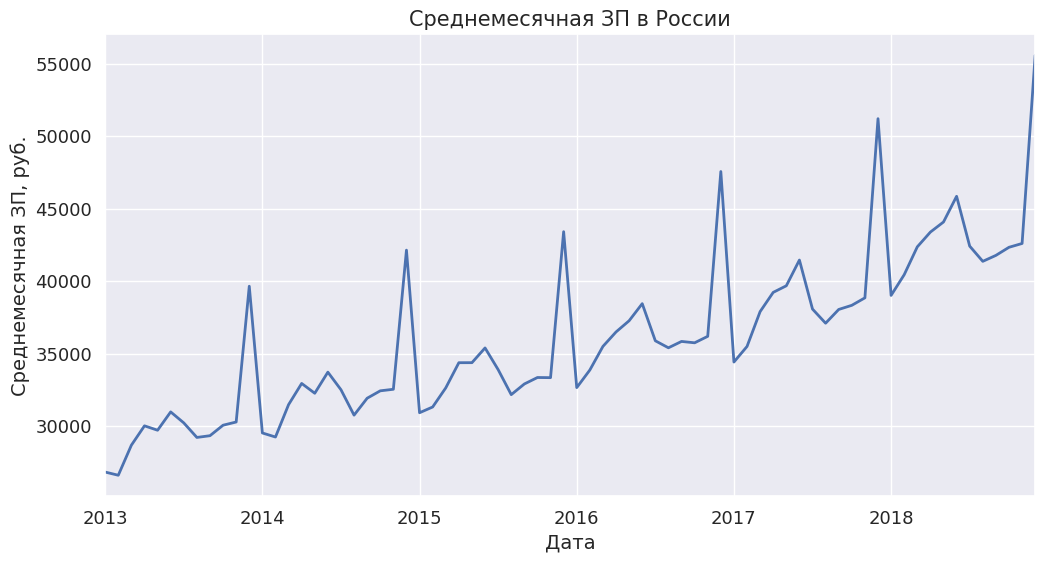

In [ ]:
salary_series.plot(figsize=(12, 6), linewidth=2, fontsize=13)
plt.title('Среднемесячная ЗП в России', fontsize=15)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Среднемесячная ЗП, руб.', fontsize=14)
plt.show()

Что такое тренировочный и тестовый наборы данных?

 **Тренировочный набор данных**

Тренировочный набор данных — это часть исходных данных, которая используется для обучения модели. Модель анализирует эти данные, "запоминает" зависимости между входными (независимыми) переменными и целевой (зависимой) переменной, а затем строит математическую или статистическую модель, которая позволяет делать прогнозы.

**Тестовый набор данных**

Тестовый набор данных — это часть исходных данных, которая используется для проверки и оценки качества работы модели, эти данные модель не видела во время обучения, что позволяет оценить её способность обобщать знания и делать прогнозы для новых, ранее неизвестных данных.

Разделим данные на тренировочный (2013 — 2017 гг.) и тестовый (2018 г.) наборы.


In [ ]:
train_series = salary_series[salary_series.index.year<2018]
test_series = salary_series[salary_series.index.year==2018]

Перейдем к непосредственной реализации алгоритма. Наш временной ряд состоит из 5-ти периодов **одинаковой длины** (12 месяцев), поэтому будем представлять неизвестную функцию в виде формулы (16).

Для поиска коэффициентов $a_k^i$ из формул (17) получаются системы уравнений:

$$
\begin{pmatrix}
\frac{1}{2} & 1 & 1 & \cdots & 1 \\
\frac{1}{2} \cos\left(\frac{\pi}{l}\right) & \cos\left(\frac{2\pi}{l}\right) & \cdots & \cos\left(\frac{N\pi}{l}\right) \\
\frac{1}{2} \cos\left(\frac{2\pi}{l}\right) & \cos\left(\frac{4\pi}{l}\right) & \cdots & \cos\left(\frac{2N\pi}{l}\right) \\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{2} \cos(\pi) & \cos(2\pi) & \cdots & \cos(N\pi)
\end{pmatrix}
\begin{pmatrix}
a_0^i \\
a_1^i \\
a_2^i \\
\vdots \\
a_N^i
\end{pmatrix}
=
\begin{pmatrix}
f_0^i \\
f_1^i \\
f_2^i \\
\vdots \\
f_N^i
\end{pmatrix}.
$$


In [ ]:
def cos(k, t, l):

    """
    Вспомогательная функция косинуса
    """
    return math.cos(math.pi*k*t/l)


def get_matrix_and_vector(period_i: np.ndarray) -> (np.ndarray, np.ndarray):

    """
    Возвращает матрицу и вектор свободных членов для нахождения коэффициентов Фурье для i-го периода.

    period_i - наблюдения i-го периода
    """

    l = len(period_i) - 1
    N = l

    y = np.empty((0,))
    matrix = np.empty((0, N+1))

    for t in range(0, l+1):
        #первое значение в каждой строке 1/2 -- множитель перед коэффициентом a_0
        row = np.array([.5])

        for k in range(1, N+1):
            row = np.append(row, cos(k, t, l))

        row = np.reshape(row, (1, N+1))
        matrix = np.append(matrix, row, axis=0)
        y = np.append(y, period_i[t])

    return matrix, y


def solve_system(M: np.ndarray,
                 b: np.ndarray) -> np.ndarray:

    """
    Решает систему линейный уравнений
    M - основная матрица системы
    b - столбец свободных членов
    """

    assert np.linalg.det(M) != 0
    return np.linalg.solve(M, b)

Далее реализуем функцию для преобразования входного ряда в матрицу, функции построения матрицы задержек, поиска ближайших соседей и прогнозирования на один шаг.

In [ ]:
def get_matrix_from_series(input_series: pd.Series,
                           m: int,
                           l: int):
    """
    Преобразует входной ряд в матрицу,
    где каждая i-я строка -- наблюдения для i-го периода

    input_series -- входной ряд
    m -- количество периодов
    l - длина периода
    """

    return input_series.values.reshape(m, l)


def get_delay_matrix(input_vector: np.ndarray,
                     p: int = 1) -> np.ndarray:
    """
    Строит матрицу задержек по входному вектору и величине задержек
    input_vector - входной вектор
    p - величина задержек
    """

    input_vector_copy = np.copy(input_vector)

    m = input_vector_copy.shape[0] % p

    #если длина ряда не кратна p, то удаляем несколько первых значений ряда
    if m != 0:
        input_vector_copy = np.delete(input_vector_copy, range(m))

    #определяем размерность матрицы зарежек
    row_dim = input_vector_copy.shape[0] // p
    col_dim = p

    #строим матрицу
    delay_matrix = np.resize(input_vector_copy,
                             new_shape=(row_dim, col_dim)).T

    return delay_matrix


def find_nearest(row: np.ndarray,
                 p: int) -> set:
    """
    Возвращает индексы ближайших соседей для последнего элемента строки
    row - входная строка
    p - величина задержек
    """

    #количество соседей
    neighbors_cnt = 2 * p + 1

    last_element = row[-1]
    all_neighbors = row[:-1]

    #находим индексы ближайших соседей
    idx = set(np.argsort(np.abs(all_neighbors-last_element))[:neighbors_cnt])

    return idx


def predict_by_one_step(input_vector: np.ndarray,
                        p: int = 1) -> float :
    """
    Прогнозирование на один шаг с помощью аналитического решения
    input_vector - входной вектор
    p - величина задержек
    """

    delay_matrix = get_delay_matrix(input_vector, p)
    last_row = delay_matrix[-1,:]
    nearest_neighbors_indexes = find_nearest(last_row, p)

    y = np.empty((0,))
    X = np.empty((0, p+1))
    for index in nearest_neighbors_indexes:
        y = np.append(y, delay_matrix[0, index+1])
        row = np.append(np.array([1]), delay_matrix[:, index])
        row = np.reshape(row, (1, p+1))
        X = np.append(X, row, axis=0)

    coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    prediction = sum(np.append(np.array([1]), delay_matrix[:, -1]) * coef)

    return prediction

Наконец реализуем функцию поиска коэффициентов для неизвестного периода и функцию прогнозирования временного ряда на следующий период.

In [ ]:
def get_new_fourier_coefs(periods: np.ndarray,
                          p: int = 1) -> list:

    """
    Возвращает коэффициенты Фурье для неизвестного периода
    periods - матрица наблюдений для известных периодов, где i-я строчка -- наблюдения i-го периода
    p - величина задержек

    """

    #список с предсказанными на след. период коэффициентами
    new_coefs = []

    #матрица с коэффициентами Фурье за все периоды. Строки -- коэфициенты за период
    coefs_for_all_periods = []

    for period in periods:

        X, y = get_matrix_and_vector(period)

        #находим коэффициенты Фурье, как решение системы линейных уравнений
        fourier_coef_for_period = solve_system(X, y)

        coefs_for_all_periods.append(fourier_coef_for_period)

    coefs_for_all_periods = np.array(coefs_for_all_periods)

    #Прогноз каждого коэффициента Фурье a_k для неизвестного периода
    #Каждый коэф. Фурье рассматривается как временной ряд, который прогнозируется на один шаг
    for i in range(coefs_for_all_periods.shape[1]):
        coef_for_next_period = predict_by_one_step(coefs_for_all_periods[:, i], p=p)
        new_coefs.append(coef_for_next_period)

    return new_coefs


def predict_next_period(new_coefs: list,
                        l: int):
    """
    Прогнозирует временной ряд на неизвестный период

    new_coefs - коэффициенты Фурье для следующего периода
    l - длина периода
    """

    new_period = []
    for t in range(0, l):
        s = new_coefs[0] / 2
        for k in range(1, len(new_coefs)):
            s += new_coefs[k]*cos(k, t, l=l-1)

        new_period.append(s)

    return new_period

Предскажем тестовый период и сравним с реальными результатами.

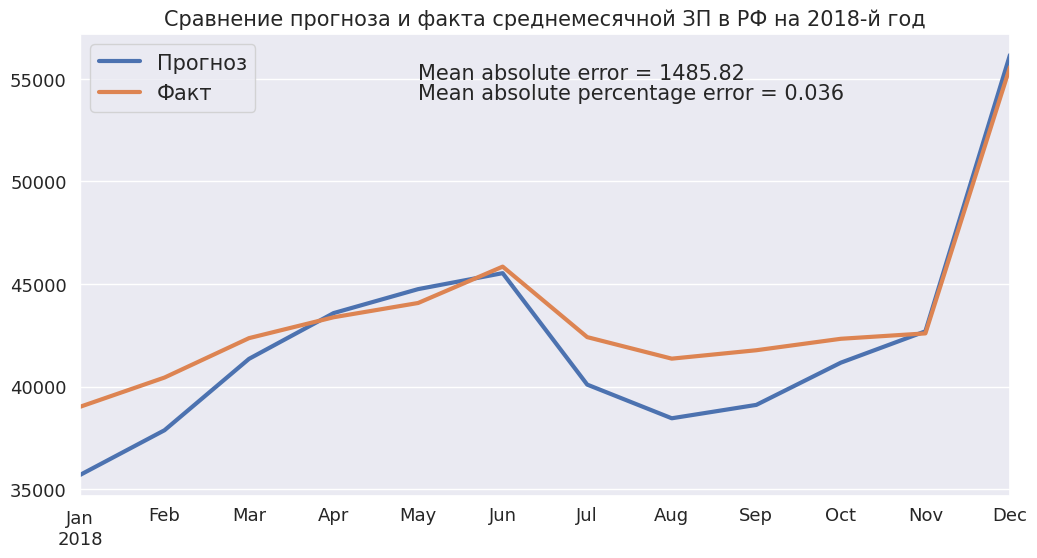

In [ ]:
m = 5 #количество периодов в train выборке
l = 12 #длина периода
p = 1 #величина задержек

matrix = get_matrix_from_series(train_series, m, l)
new_coefs = get_new_fourier_coefs(matrix, p)
test_pred = predict_next_period(new_coefs, l)
test_pred = pd.Series(test_pred, index=test_series.index)

#ошибка прогноза
mae = round(mean_absolute_error(test_pred, test_series), 2)
mape = round(mean_absolute_percentage_error(test_series, test_pred), 3)

#построим график
test_pred.plot(figsize=(12, 6), linewidth=3,
               fontsize=13, label='Прогноз')

test_series.plot(figsize=(12, 6), linewidth=3,
                 fontsize=13, label='Факт')

plt.legend(fontsize=15)
plt.text(test_series.index[4], 55000, f'Mean absolute error = {mae}', fontsize=15)
plt.text(test_series.index[4], 54000, f'Mean absolute percentage error = {mape}', fontsize=15)
plt.title('Сравнение прогноза и факта среднемесячной ЗП в РФ на 2018-й год', fontsize=15)
plt.show()

**Проведем интерпретацию результатов**

На графике показано сравнение прогноза и фактических данных средней месячной заработной платы (ЗП) в РФ за 2018 год. Вот основные выводы:

**1. Ошибки модели:**
- **Mean Absolute Error (MAE):** 1485.82 руб.
  - Это означает, что в среднем прогноз отличается от фактических данных на **1485.82 руб.**.
  
- **Mean Absolute Percentage Error (MAPE):** 0.036 (или 3.6%).
  - Это говорит о том, что модель в среднем ошибается на **3.6%** относительно фактических данных. Такой уровень ошибки считается **умеренным**, особенно для задач прогнозирования экономических показателей.

**2. Динамика прогнозов:**
- Прогноз модели в целом хорошо отражает общую тенденцию фактических данных:
  - Рост в первые месяцы года (январь — июнь).
  - Падение с июня до сентября.
  - Ускоренный рост в конце года (октябрь — декабрь).
  
- **Расхождения:**
  - Наиболее заметные расхождения между прогнозом и фактом наблюдаются в:
    - **Летние месяцы (июль — сентябрь):** Модель недооценивает снижение ЗП.
    - **Пиковые значения (декабрь):** Прогноз чуть запаздывает с резким ростом.

**Вывод**

Модель демонстрирует **приемлемую точность** и хорошо прогнозирует общую тенденцию, однако требует доработки для учёта локальных отклонений, особенно в летние месяцы и декабрь. Уровень ошибки (3.6%) делает её полезной для многих прикладных задач, таких как планирование зарплатных бюджетов.

### <font color=#04b4a2> Сезонность и цикличность.</font>

Когда мы анализируем временные ряды, такие как среднемесячные зарплаты, важно понимать разницу между **сезонностью** и **цикличностью**, поскольку они отражают разные аспекты поведения данных.

1. **Сезонность**
 - Это **регулярные, повторяющиеся изменения** временного ряда, связанные с **фиксированным временным интервалом**, например, годом, кварталом, месяцем, неделей и т.д.
  - Сезонность вызвана **природными**, социальными или экономическими причинами, которые повторяются из года в год.
  
2. **Цикличность**
  - Это **долгосрочные, нерегулярные колебания**, связанные с экономическими, социальными или другими крупными факторами.
  - В отличие от сезонности, цикличность **не имеет фиксированного периода**.
  - Циклы могут длиться несколько лет и зависят от внешних факторов, таких как экономические кризисы, изменения на рынке труда и т.д.

Найдем сезонность и цикличность. Для начала немного преобразуем данные.

In [ ]:
salary_long = pd.melt(data, id_vars=['year'], var_name='month', value_name='salary')

salary_long['date'] = pd.to_datetime(salary_long['year'].astype(str) + '-' + salary_long['month'].astype(str))
salary_long = salary_long.sort_values('date').set_index('date')

# уберем лишние колонки
salary_long = salary_long[['salary']]

salary_long.head(12)

<ipython-input-42-6f50668aa320>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  salary_long['date'] = pd.to_datetime(salary_long['year'].astype(str) + '-' + salary_long['month'].astype(str))


,salary
date,
2013-01-01,26840
2013-02-01,26620
2013-03-01,28693
2013-04-01,30026
2013-05-01,29723
2013-06-01,30986
2013-07-01,30229
2013-08-01,29226
2013-09-01,29346


 Выполним преобразование Фурье для временного ряда (среднемесячных зарплат) с целью выявления сезонности.

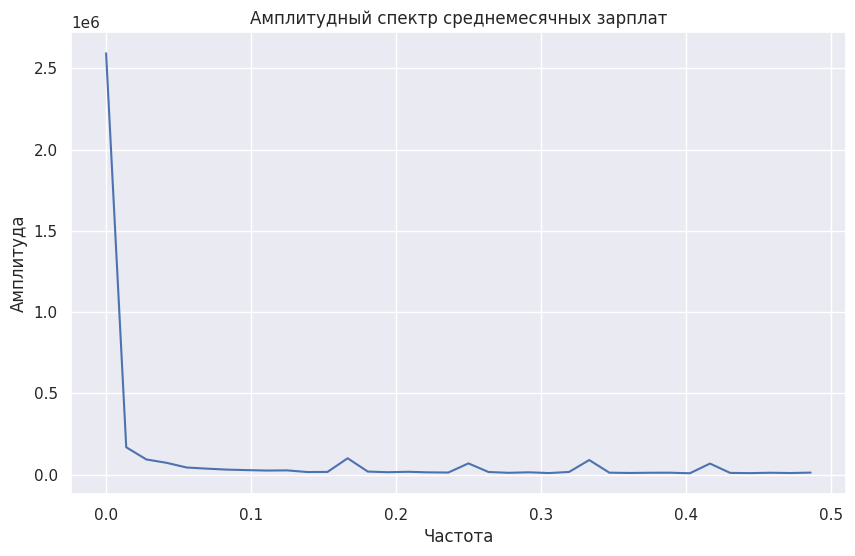

In [ ]:
# Выполняем преобразование Фурье для временного ряда зарплат
# Преобразование позволяет разложить временной ряд на частоты
salary_fft = np.fft.fft(salary_long['salary'])

# Создаём массив частот, соответствующих результату преобразования Фурье
# d=1 означает, что данные измеряются ежемесячно (интервал = 1 месяц)
frequency = np.fft.fftfreq(len(salary_fft), d=1)

# Строим спектр амплитуд (зависимость амплитуды от частоты)
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.plot(
    frequency[:len(frequency)//2],  # Берём только положительные частоты
    np.abs(salary_fft[:len(salary_fft)//2])  # Вычисляем модули (амплитуды) для каждой частоты
)

plt.title("Амплитудный спектр среднемесячных зарплат")
plt.xlabel("Частота")
plt.ylabel("Амплитуда")
plt.show()

**Проведем интерпретацию результатов**

На графике представлен **амплитудный спектр среднемесячных зарплат**, построенный на основе преобразования Фурье. Вот что можно извлечь из результатов:

1. **Наличие главной частоты**
- Самый высокий пик амплитуды находится при частоте, близкой к нулю. Это соответствует **среднему значению ряда** или долгосрочному тренду.
- Высокая амплитуда вблизи нулевой частоты указывает на то, что в данных преобладает общий уровень зарплат (среднее значение), а не ярко выраженные частотные колебания.

2. **Другие частоты**
- Видны небольшие пики при частотах в диапазоне $0.1–0.3$:
  - Эти частоты могут соответствовать **сезонным колебаниям**. Например:
    - Частота около $ f = \frac{1}{12} $ может указывать на годовой цикл ($12$ месяцев).
    - Частота около $ f = \frac{1}{6} $ может указывать на полугодовую периодичность.
- Однако амплитуды этих частот значительно меньше, чем у главного тренда, что говорит о слабом влиянии этих циклов.

3. **Плавность спектра**
- В остальной части спектра амплитуда практически отсутствует, что указывает на **отсутствие значимых высокочастотных колебаний** (например, месячных или недельных изменений).

4. **Выводы о сезонности**
- График показывает, что данные имеют слабую сезонность:
  - Есть признаки годового цикла, но его амплитуда мала по сравнению с основным трендом.
- Это может означать, что сезонность зарплат не играет значительной роли, или она частично скрыта шумом или другими факторами.

Выделим **цикличность** и **сезонность** временного ряда, анализируя частоты и амплитуды преобразования Фурье. Как мы это делаем:

1. **Фильтрует значимые частоты:**
   - Определяется порог в 1% от максимальной амплитуды. Это позволяет выделить только наиболее значимые частоты, соответствующие как сезонным, так и циклическим колебаниям.

2. **Находит периоды:**
   - Период каждой частоты вычисляется как обратная величина частоты $( T = 1/f $).
   - Отбираются конечные периоды, исключая бесконечные значения, которые возникают при $ f = 0 $ (нулевая частота).

3. **Восстанавливает временной ряд:**
   - Сохраняются только частоты выше порога амплитуды (значимые частоты), чтобы выделить циклические и сезонные компоненты.
   - Обратное преобразование Фурье (`ifft`) используется для восстановления сигнала из значимых частот.

4. **Разделение на цикличность и сезонность:**
   - Цикличность выделяется с помощью низкочастотных компонентов $( f \leq 0.05 $).
   - Сезонность выделяется с помощью высокочастотных компонентов $( f > 0.05 $).


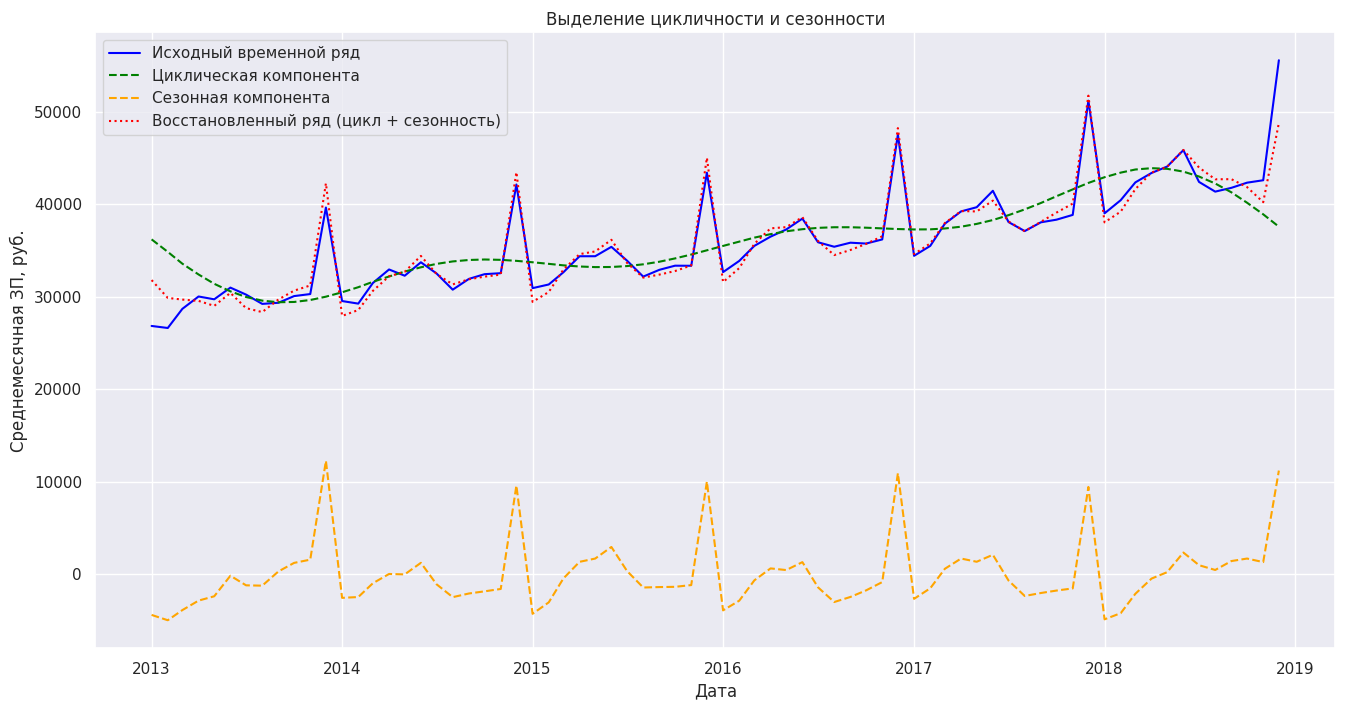

Доминирующие периоды: [-72.         -36.         -24.         -18.         -14.4
 -12.         -10.28571429  -6.          -4.          -3.
  -2.4         -2.           2.4          3.           4.
   6.          10.28571429  12.          14.4         18.
  24.          36.          72.        ]


<ipython-input-45-4abb0e3134f5>:53: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies[significant_indices]  # Периоды


In [ ]:
# исходный временной ряд зарплат
salary_series = salary_long['salary']

# Преобразование Фурье
salary_fft = fft(salary_series)

# Вычисление частот и амплитуд
frequencies = np.fft.fftfreq(len(salary_fft), d=1)  # Частоты
amplitudes = np.abs(salary_fft)  # Амплитуды

# Новый порог амплитуды для выделения значимых частот
significant_indices = np.where(amplitudes > 0.01 * np.max(amplitudes))[0]

# Разделяем низкие и высокие частоты
low_frequency_threshold = 0.05  # Порог для разделения цикличности и сезонности

# Выделяем цикличность (низкочастотные компоненты)
cyclic_fft = np.zeros_like(salary_fft)
for idx in significant_indices:
    if np.abs(frequencies[idx]) <= low_frequency_threshold:  # Низкие частоты
        cyclic_fft[idx] = salary_fft[idx]
        cyclic_fft[-idx] = salary_fft[-idx]  # Симметричная частота

# Выделяем сезонность (высокочастотные компоненты)
seasonal_fft = np.zeros_like(salary_fft)
for idx in significant_indices:
    if np.abs(frequencies[idx]) > low_frequency_threshold:  # Высокие частоты
        seasonal_fft[idx] = salary_fft[idx]
        seasonal_fft[-idx] = salary_fft[-idx]  # Симметричная частота

# Восстанавливаем циклическую компоненту
cyclic_component = ifft(cyclic_fft).real

# Восстанавливаем сезонную компоненту
seasonal_component = ifft(seasonal_fft).real

# Восстанавливаем полный ряд (цикл + сезонность)
combined_component = cyclic_component + seasonal_component

# Визуализация
plt.figure(figsize=(16, 8))
plt.plot(salary_series.index, salary_series, label='Начальный временной ряд', color='blue')
plt.plot(salary_series.index, cyclic_component, label='Циклическая компонента', linestyle='--', color='green')
plt.plot(salary_series.index, seasonal_component, label='Сезонная компонента', linestyle='--', color='orange')
plt.plot(salary_series.index, combined_component, label='Восстановленный ряд (цикл + сезонность)', linestyle=':', color='red')
plt.title("Выделение цикличности и сезонности")
plt.xlabel("Дата")
plt.ylabel("Среднемесячная ЗП, руб.")
plt.legend()
plt.show()

# Анализ доминирующих периодов
periods = 1 / frequencies[significant_indices]  # Периоды
periods = periods[np.isfinite(periods)]  # исключаем бесконечные значения
dominant_periods = np.sort(periods)  # Сортируем
print("Доминирующие периоды:", dominant_periods)

<a name="task_11"></a>
**<font color=#FF5EDD>Задача 11**</font> (17 баллов)

Датасет [Monthly Milk Production Pounds](#https://www.kaggle.com/datasets/pkmisra/monthly-milk-production-pounds) содержит данные о среднем месячном производстве молока на одну корову в фунтах в США за период с января $1962$ года по декабрь $1975$ года. Данные представлены в виде временного ряда с частотой $12$ наблюдений в год (ежемесячные данные).

1. Постройте график временного ряда. Определите основные частоты и периоды с помощью преобразования Фурье, сегментируйте временной ряд на циклическую (долгосрочную) и сезонную (краткосрочную) составляющие)

2. Восстановите временной ряд, используя только выделенные циклическую и сезонную компоненты. Сравните восстановленный временной ряд с исходным. Оценить влияние тренда и шумов.

3. Построите краткосрочный прогноз, используя метод Фурье. Оптимизируйте параметры модели (например: количество используемых частот), чтобы улучшить точность прогноза.

   Разбиение данных:
   - Тренировочный набор данных: Данные с января $1962$ года по декабрь $1973$ года ($12$ лет).
   - Тестовый набор данных: Данные с января $1974$ года по декабрь $1975$ года ($2$ года).

4. Постройте долгосрочный прогноз. Оценить, насколько хорошо модель воспроизводит сезонные и циклические паттерны на больших горизонтах.

   Разбиение данных:
   - Тренировочный набор данных: Данные с января $1962$ года по декабрь $1970$ года ($9$ лет).
   - Тестовый набор данных: Данные с января $1971$ года по декабрь $1975$ года ($5$ лет).

5. Рассчитайте метрику MAE (средняя абсолютная ошибка) для краткосрочных и долгосрочных прогнозов. Сравните качество краткосрочных и долгосрочных прогнозов. Сделайте выводы о выявленных сезонных и циклических паттернах, их повторяемости и качестве прогнозов.

Не забудьте: проверить датасет на пропуски. Если они есть, заполните пропущенные значения средним значением соседних точек.

Данные можно скачать по этой [ссылке](#https://drive.google.com/file/d/1PNDtoT9SxN_bGHS3xyKburhM-6pp0QMp/view?usp=sharing)


In [ ]:
#data = pd.read_csv('monthlyMilkProduction.csv')
#data.head()

# Ваш код здесь